In [58]:
# Import the libraries first

import numpy as np
import pandas as pd

# We will use matplotlib to plot figures
import matplotlib.pyplot as plt
import seaborn as sns

# For regression analysis we will use the statsmodels package
import statsmodels.formula.api as sm

# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

# For evluation of the regression models
from statsmodels.tools.eval_measures import rmse

In [6]:
sheets = ['Set 1','Set 2','Set 3','Set 4','Set 5','Set 6']
data_set = []

for sheet in sheets:
    data_set.append(pd.read_excel("linear_regresion_data-1.xlsx",sheet_name=sheet))

## Set 1
***

### 1.1 Create a scatter plot
Visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient):

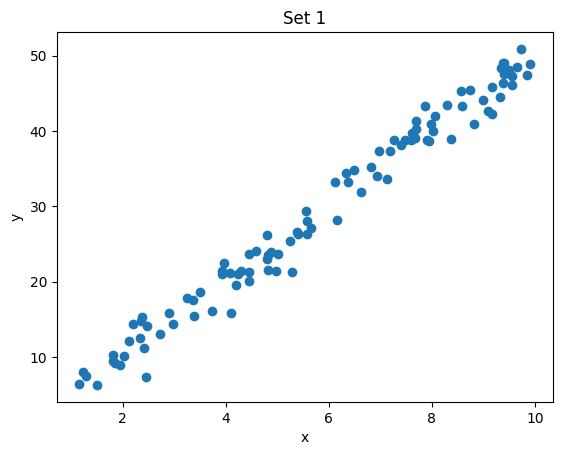

In [7]:
df1 = data_set[0]
plt.scatter(df1.x, df1.y,marker="o")
plt.title("Set 1")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 1.2 If the relation is not linear, transform the data accordingly:

By visual inspection, the scatterplot shows a linear relationship between x and y because as one variable increases, the other variable also increases approximately at the same rate. Transformation is not required.

### 1.3 Pearson's correlation coefficient

In [9]:
# This will calculate the correlation matrix
cm1 = df1.corr(method = 'pearson')

# Print correlation matrix
cm1

,y,x
y,1.000000,0.989468
x,0.989468,1.000000


### 1.4 Central tendency

In [14]:
# Calculate the means of x, y
mu_x1 = np.mean(df1.x)
mu_y1 = np.mean(df1.y)

# Calculate the standard deviations of x, y
sig_x1 = np.std(df1.x)
sig_y1 = np.std(df1.y)

print ("Mean_X = {mx1}, Mean_Y = {my1}".format(mx1=mu_x1, my1=mu_y1))
print("Sigma_X = {sx1}, Sigma_Y = {sy1}".format(sx1=sig_x1, sy1=sig_y1))

Mean_X = 5.809318189398433, Mean_Y = 29.193214088275514
Sigma_X = 2.6045909363658235, Sigma_Y = 13.120135348820122


### 1.5 Intercept and slopes

In [18]:
beta_1 = sig_y1/sig_x1 * cm1.loc['x', 'y']
beta_0 = mu_y1 - beta_1 * mu_x1

print("Intercept = {b1}\nSlope = {b2}".format(b1=beta_0, b2=beta_1))

Intercept = 0.23807024664960252
Slope = 4.9842585476668955


### 1.6 Create an OLS model for the original and transformed data if required:
1. Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate.
2. Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
3. If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)

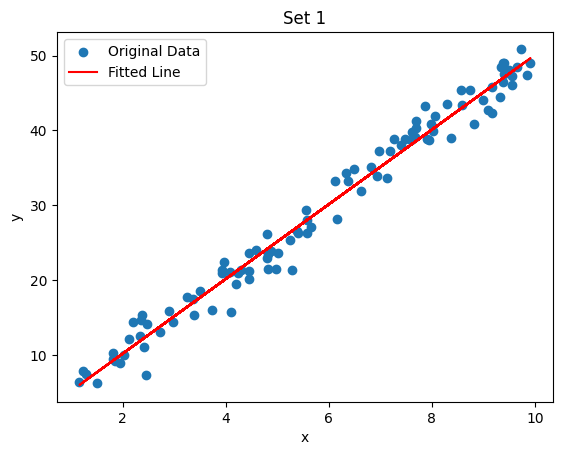

Intercept    0.238070
x            4.984259
dtype: float64

In [22]:
# Initialize the regression model
lm1 = sm.ols('y ~ x', data = df1)
results1 = lm1.fit()

# Extract regression parameters from the model
intercept1, slope1 = results1.params

# Predict y
df1['y_predicted'] = intercept1 + slope1 * df1.x

# Add regression line

plt.scatter(df1.x, df1.y,marker="o",label='Original Data')
plt.plot(df1.x, df1.y_predicted , 'r-', label='Fitted Line');
plt.title("Set 1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

results1.params

As can be seen, the regression line goes approximately through the center of the points cloud, and approximately one half of the points lies above the regression line and another half lies below. This indicate valid regression.

###  1.7 Residuals

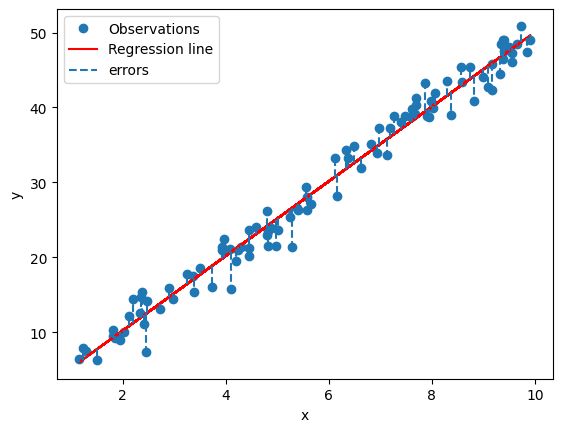

In [24]:
# We can even depict the errors associated with individual observations

plt.plot(df1.x, df1.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Plot regression line
plt.plot(df1.x, df1.y_predicted, 'r-', label='Regression line')

# Plot errors
plt.vlines(df1.x, df1.y_predicted, df1.y, linestyles='dashed', label = 'errors')

# Add legend
plt.legend()
plt.show()

To better asses the resulting model, the residuals will be inspected:

count    1.000000e+02
mean     1.101341e-15
std      1.908727e+00
min     -3.763343e+00
25%     -1.472735e+00
50%     -2.630865e-01
75%      1.133296e+00
max      5.254912e+00
Name: y_residuals, dtype: float64

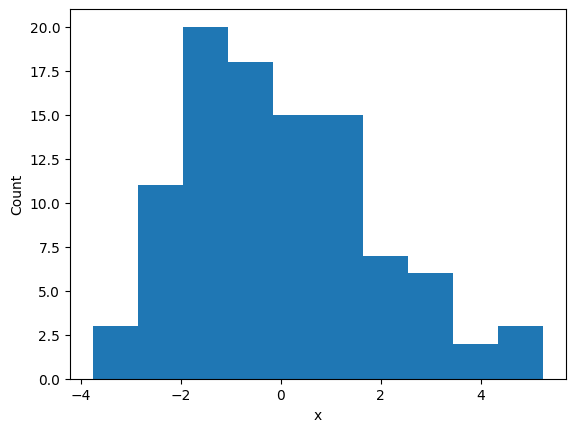

In [25]:
# Calculate the residuals
df1['y_residuals'] = df1['y_predicted'] - df1['y']

# Histogram of the residuals
residuals_hist = plt.hist(df1.y_residuals)
plt.xlabel('x')
plt.ylabel('Count')

# Statistical summary of the residuals
df1['y_residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -3.76, to 5.26. Residuals' mean and median are close to zero. Taken together, the model seems to be valid, and suffers by a very little bias.

### 1.8 Plot regression results against one regressor.

This plots four graphs in a 2 by 2 figure:
- ‘endog versus exog’
- ‘residuals versus exog’
- ‘fitted versus exog’
- ‘fitted plus residual versus exog’

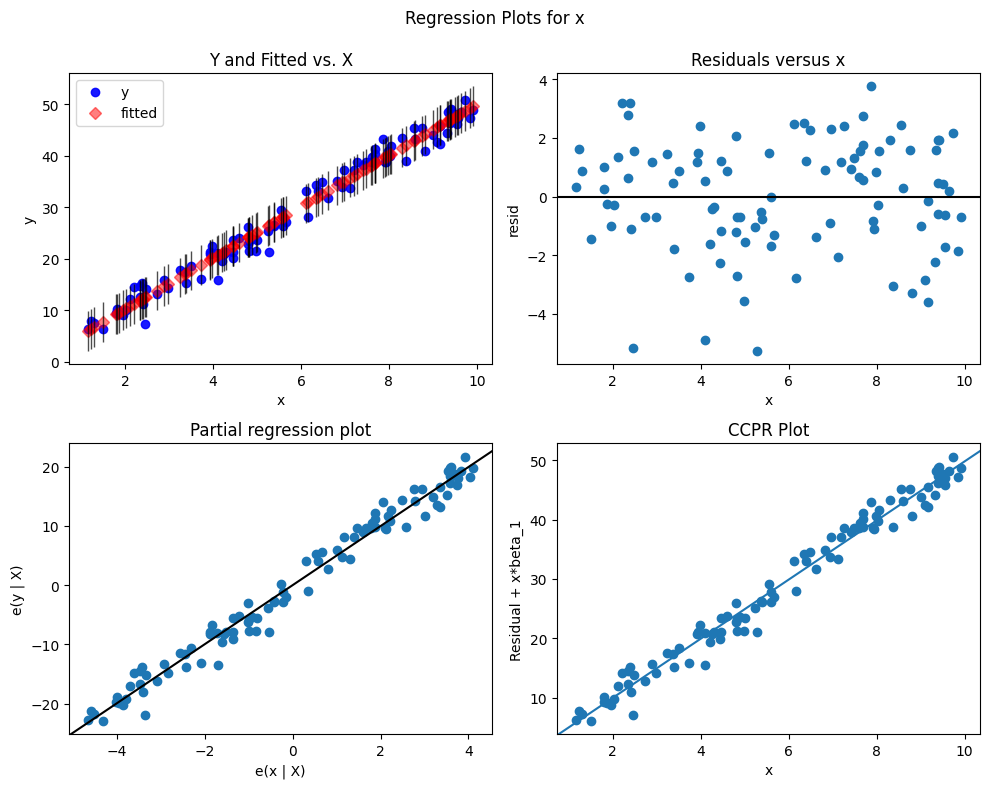

In [27]:
fig = plt.figure(figsize=(10,8));
fig = plot_regress_exog(results1, "x", fig = fig);

### 1.9 Inspecting the leverage of individual residuals:

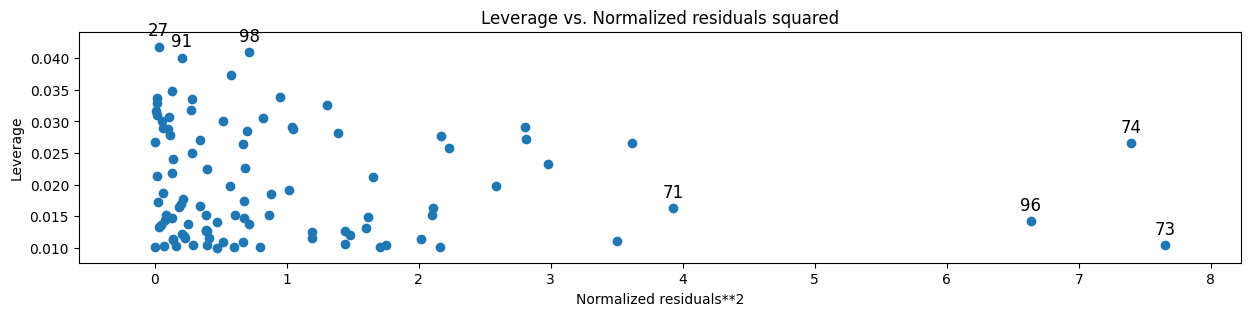

In [32]:
fig, ax = plt.subplots(figsize=(15,3))
fig = plot_leverage_resid2(results1, ax=ax)

As we can see, generally the greater the residual lower the leverage.

### 1.10 Influence plot

To get a better picture, plotting the influence plot of the individual observations:

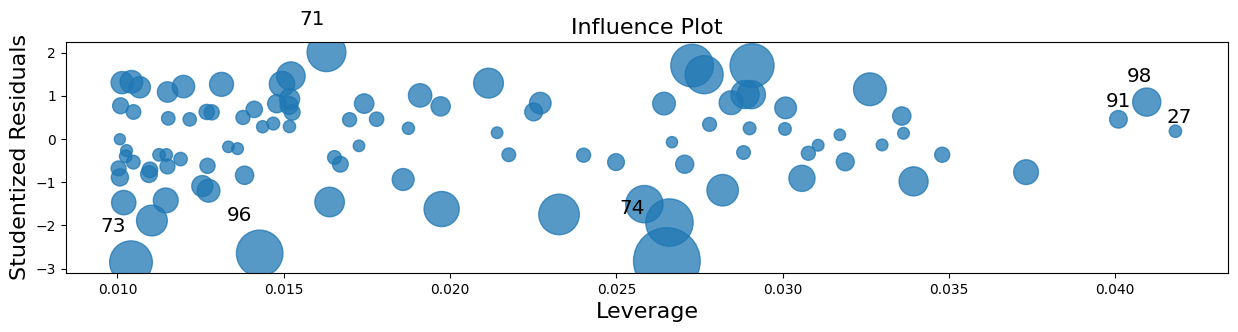

In [40]:
fig, ax = plt.subplots(figsize=(15,3))
fig = influence_plot(results1, ax=ax)

This plot highlights how influential individual observations are, i.e. highlight the observation with great residuals yet with great leverage. Since there are no studentized residuals larger than 3 or smaller than -3, this indicates there are no outliers  with high leverage. Visual inspection is sucessfully done.

### 1.11 Inspecting the regression output and also RMSE:

In [45]:
rmse1 = rmse(df1.y, df1.y_predicted)
nrmse1 = rmse1 / df1.y.mean()
print('RMSE = %f' % rmse1)
print('NRMSE = %f' % nrmse1)

results1.summary()

RMSE = 1.899159
NRMSE = 0.065055


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           4.47e-84
Time:                        00:16:45   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The obtaned regression slope is positive (4.98), and the associated p-value is zero. This indicates very significant positive association between x and y.

The obtained regression intercept is 0.238. Since the model is linear, i.e. the expected value when the x variable is zero is 0.238.

R-squared from the model is 0.979, which means the x variable can explain only approximately 97% of the total variance of the y variable. This is a very big fraction, and it means that x is sufficient to accurately predict y.

The obtained RMSE is approximately 1.9, which means that on average our predictions are off by 1.9, which is approximately 6.5% of the average y data in our dataset.

## Set 2
***

### 2.1 Create a scatter plot

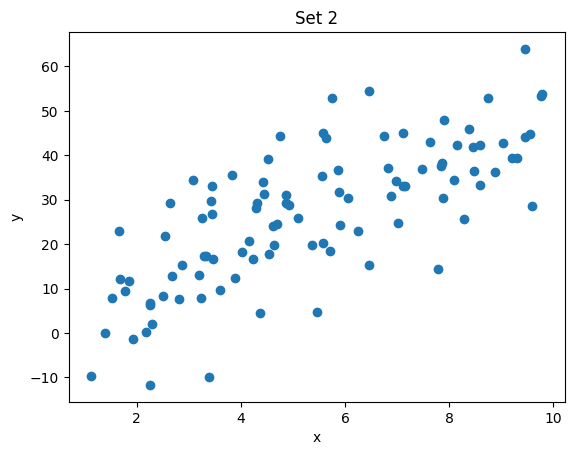

In [46]:
df2 = data_set[1]
plt.scatter(df2.x, df2.y,marker="o")
plt.title("Set 2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 2.2 If the relation is not linear, transform the data accordingly:
By visual inspection, the scatterplot shows a somewhat linear relationship between x and y because as one variable increases, the other variable also increases approximately at the same rate. The linear association however may not be as strong as that in Set 1. Regardless, linear model is still appropriate. Transformation is not required.

### 2.3 Pearson's correlation coefficient

In [47]:
# This will calculate the correlation matrix
cm2 = df2.corr(method = 'pearson')

# Print correlation matrix
cm2

,y,x
y,1.000000,0.745168
x,0.745168,1.000000


### 2.4 Central tendency

In [48]:
# Calculate the means of x, y
mu_x2 = np.mean(df2.x)
mu_y2 = np.mean(df2.y)

# Calculate the standard deviations of x, y
sig_x2 = np.std(df2.x)
sig_y2 = np.std(df2.y)

print ("Mean_X = {mx1}, Mean_Y = {my1}".format(mx1=mu_x2, my1=mu_y2))
print("Sigma_X = {sx1}, Sigma_Y = {sy1}".format(sx1=sig_x2, sy1=sig_y2))

Mean_X = 5.375184037349295, Mean_Y = 26.77470735358854
Sigma_X = 2.4242431111334604, Sigma_Y = 15.542091430022525


### 2.5 Intercept and slopes

In [66]:
beta_1 = sig_y2/sig_x2 * cm2.loc['x', 'y']
beta_0 = mu_y2 - beta_1 * mu_x2

print("Intercept = {b1}\nSlope = {b2}".format(b1=beta_0, b2=beta_1))

Intercept = 1.0955520655451174
Slope = 4.777353688657473


### 2.6 Create an OLS model for the original and transformed data if required:
1. Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate.
2. Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
3. If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)

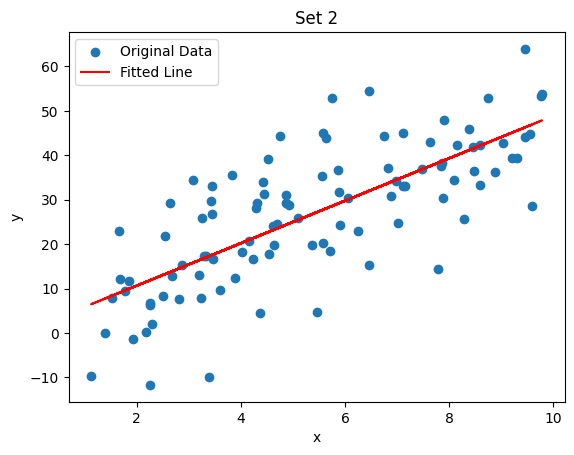

In [50]:
# Initialize the regression model
lm2 = sm.ols('y ~ x', data = df2)
results2 = lm2.fit()

# Extract regression parameters from the model
intercept, slope = results2.params

# Predict y
df2['y_predicted'] = intercept + slope * df2.x

# Add regression line
plt.scatter(df2.x, df2.y,marker="o",label='Original Data')
plt.plot(df2.x, df2.y_predicted , 'r-', label='Fitted Line');
plt.title("Set 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

As can be seen, the regression line goes approximately through the center of the points cloud, and approximately one half of the points lies above the regression line and another half lies below. This indicate valid regression.

To better asses the resulting model, the residuals will be inspected:

###  2.7 Residuals

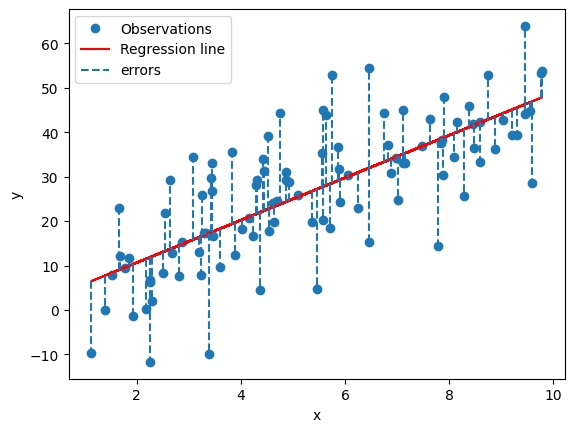

In [51]:
# We can even depict the errors associated with individual observations

plt.plot(df2.x, df2.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Plot regression line
plt.plot(df2.x, df2.y_predicted, 'r-', label='Regression line')

# Plot errors
plt.vlines(df2.x, df2.y_predicted, df2.y, linestyles='dashed', label = 'errors')

# Add legend
plt.legend()
plt.show()

count    1.000000e+02
mean    -2.984279e-15
std      1.041688e+01
min     -2.427189e+01
25%     -6.825796e+00
50%      3.255999e-01
75%      6.370633e+00
max      2.713100e+01
Name: y_residuals, dtype: float64

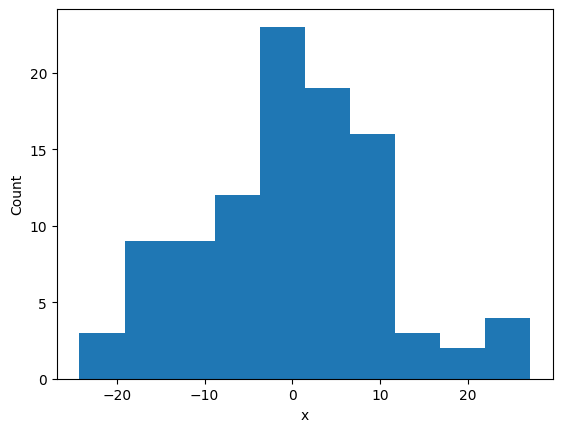

In [52]:
# Calculate the residuals
df2['y_residuals'] = df2['y_predicted'] - df2['y']

# Histogram of the residuals
residuals_hist2 = plt.hist(df2.y_residuals)
plt.xlabel('x')
plt.ylabel('Count')

# Statistical summary of the residuals
df2['y_residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -24.3, to 27.1. Residuals' mean and median are close to zero. Taken together, the model seems to be valid, and suffers by a very little bias.

### 2.8 Plot regression results against one regressor.

This plots four graphs in a 2 by 2 figure:
- ‘endog versus exog’
- ‘residuals versus exog’
- ‘fitted versus exog’
- ‘fitted plus residual versus exog’

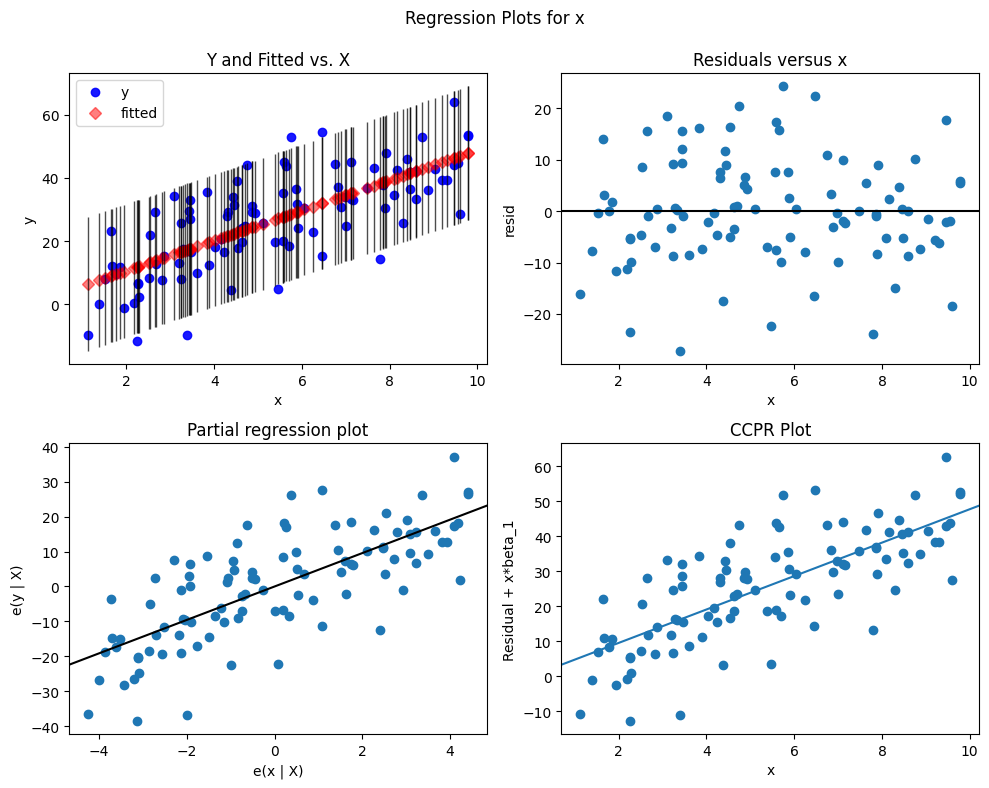

In [54]:
fig = plt.figure(figsize=(10,8));
fig = plot_regress_exog(results2, "x", fig = fig);

Inspecting the leverage of individual residuals:

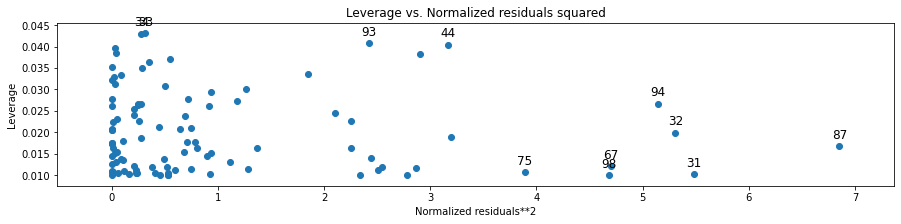

In [14]:
fig, ax = plt.subplots(figsize=(15,3))
fig = plot_leverage_resid2(lm2, ax=ax)

As we can see, generally the greater the residual lower the leverage.

### 2.10 Influence plot

To get a better picture, plotting the influence plot of the individual observations:

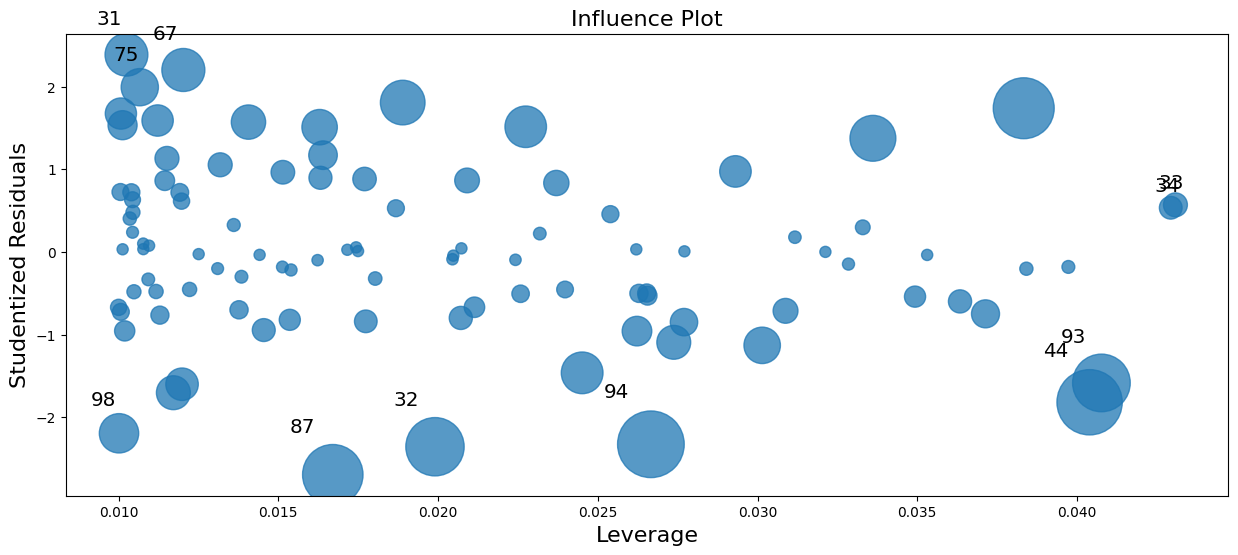

In [55]:
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(results2, ax=ax)

This plot highlights how influential individual observations are, i.e. highlight the observation with great residuals yet with great leverage. Since there are no studentized residuals larger than 3 or smaller than -3, this indicates there are no outliers  with high leverage. Visual inspection is sucessfully done.

### 2.11 Inspecting the regression output and also RMSE:

In [56]:
rmse2 = rmse(df2.y, df2.y_predicted)
nrmse2 = rmse2 / df2.y.mean()
print('RMSE = %f' % rmse2)
print('NRMSE = %f' % nrmse2)

results2.summary()

RMSE = 10.364663
NRMSE = 0.387106


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           6.11e-19
Time:                        00:46:56   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.668      -3.958       6.149
x              4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The obtaned regression slope is positive (4.77), and the associated p-value is zero. This indicates very significant positive association between x and y.

The obtained regression intercept is 1.10. Since the model is linear, i.e. the expected value when the x variable is zero is 1.10.

R-squared from the model is 0.555, which means the x variable can explain only approximately 55.5% of the total variance of the y variable. This is a moderate fraction, and it means that x is sufficient to accurately predict y half the time.

The obtained RMSE is approximately 10.4, which means that on average our predictions are off by 10.4, which is approximately 38.7% of the average y data in our dataset.

## Set 3
***

### 3.1 Create a scatter plot

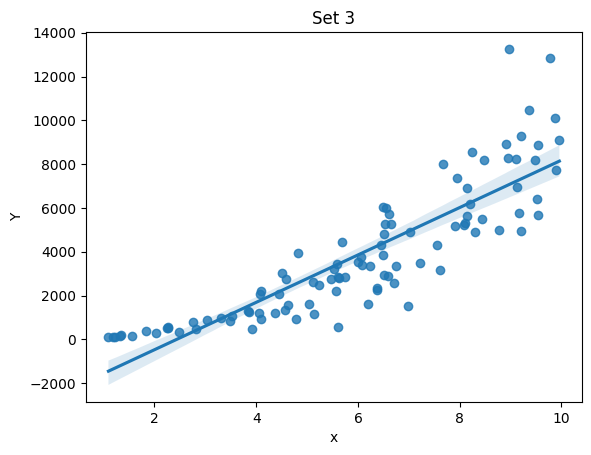

In [59]:
df3 = data_set[2]
sns.regplot(x=df3.x, y=df3.Y)
plt.title("Set 3")
plt.xlabel("x")
plt.ylabel("Y")
plt.show()

By visual inspection, the scatterplot shows a positive and nonlinear association between the two variables. It can be seen that as x increases, y appears to increase at squared rate. Based on observation, this shows a quadratic relationships and therefore linear model is not appropriate.

### 3.2 If the relation is not linear, transform the data accordingly:

Since the relationship is quadratic, the sensible approach for linear transformation is to reduce the power of y variable by square-rooting it.

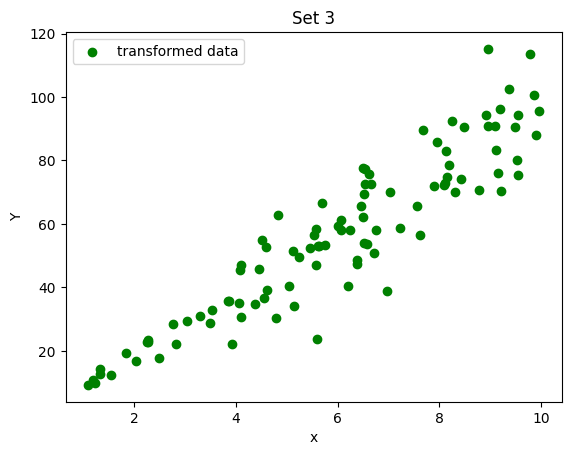

In [60]:
df3['sqrt_y'] = np.sqrt(df3.Y)
plt.scatter(df3.x, df3.sqrt_y,marker="o",color='green',label="transformed data");
plt.title("Set 3")
plt.xlabel("x")
plt.ylabel("Y")
plt.legend()
plt.show()

### 3.3 Pearson's correlation coefficient

In [62]:
# This will calculate the correlation matrix
cm3 = df3.corr(method = 'pearson')

# Print correlation matrix
cm3

,Y,x,sqrt_y
Y,1.000000,0.869031,0.970819
x,0.869031,1.000000,0.925824
sqrt_y,0.970819,0.925824,1.000000


### 3.4 Central tendency

In [63]:
# Calculate the means of x, y
mu_x3 = np.mean(df3.x)
mu_y3 = np.mean(df3.sqrt_y)

# Calculate the standard deviations of x, y
sig_x3 = np.std(df3.x)
sig_y3 = np.std(df3.sqrt_y)

print ("Mean_X = {mx1}, Mean_Y = {my1}".format(mx1=mu_x3, my1=mu_y3))
print("Sigma_X = {sx1}, Sigma_Y = {sy1}".format(sx1=sig_x3, sy1=sig_y3))

Mean_X = 5.999130000000001, Mean_Y = 56.50773713115479
Sigma_X = 2.431807112642777, Sigma_Y = 25.704458039227553


### 3.5 Intercept and slopes

In [65]:
beta_1 = sig_y3/sig_x3 * cm3.loc['x', 'sqrt_y']
beta_0 = mu_y3 - beta_1 * mu_x3

print("Intercept = {b1}\nSlope = {b2}".format(b1=beta_0, b2=beta_1))

Intercept = -2.200087854659266
Slope = 9.786056475824669


Now, the scatter plot appears more linear than in its raw form.

### 3.6 Create an OLS model for the original and transformed data if required:
1. Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate.
2. Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
3. If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)

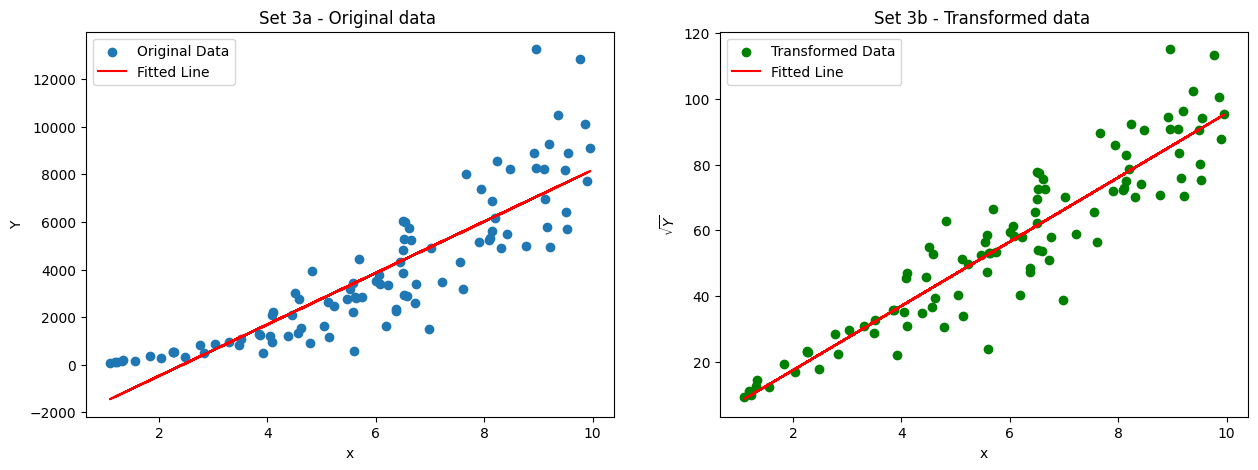

In [67]:
# OLS Regression

# Original data
lm3a = sm.ols('Y ~ x', data = df3)
results3a = lm3a.fit()
intercept, slope = results3a.params
df3['y_predicted'] = intercept + slope * df3.x

# Transformed data
lm3b = sm.ols('sqrt_y ~ x', data = df3)
results3b = lm3b.fit()
intercept, slope = results3b.params
df3['sqrt_y_predicted'] = intercept + slope * df3.x

# Add regression line
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.scatter(df3.x, df3.Y,marker="o",label='Original Data')
ax1.plot(df3.x, df3.y_predicted , 'r-', label='Fitted Line');
ax1.set_title("Set 3a - Original data ");
ax1.set_xlabel("x")
ax1.set_ylabel("Y")
ax1.legend()

ax2.scatter(df3.x, df3.sqrt_y,marker="o",color='green',label='Transformed Data')
ax2.plot(df3.x, df3.sqrt_y_predicted , 'r-', label='Fitted Line');
ax2.set_title("Set 3b - Transformed data ");
ax2.set_xlabel("x")
ax2.set_ylabel("$\sqrt{Y}$")
ax2.legend();

Set 3a shows the original data with its fitted OLS regression. In Set 3b, the regression line goes approximately through the center of the transformed points cloud, and approximately one half of them lies above the regression line and another half lies below. This indicate valid regression. To better asses the resulting model, the residuals will be inspected:

###  3.7 Residuals

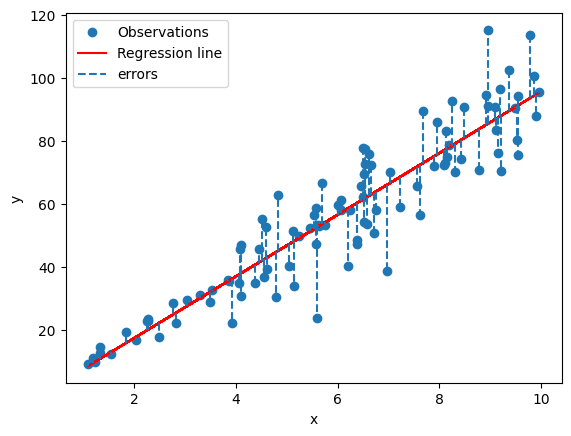

In [73]:
# We can even depict the errors associated with individual observations

plt.plot(df3.x, df3.sqrt_y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Plot regression line
plt.plot(df3.x, df3.sqrt_y_predicted, 'r-', label='Regression line')

# Plot errors
plt.vlines(df3.x, df3.sqrt_y_predicted, df3.sqrt_y, linestyles='dashed', label = 'errors')

# Add legend
plt.legend()
plt.show()

count    1.000000e+02
mean     1.792344e-14
std      9.764075e+00
min     -2.966523e+01
25%     -4.891936e+00
50%     -5.482943e-01
75%      5.731302e+00
max      2.873840e+01
Name: sqrt_y_residuals, dtype: float64

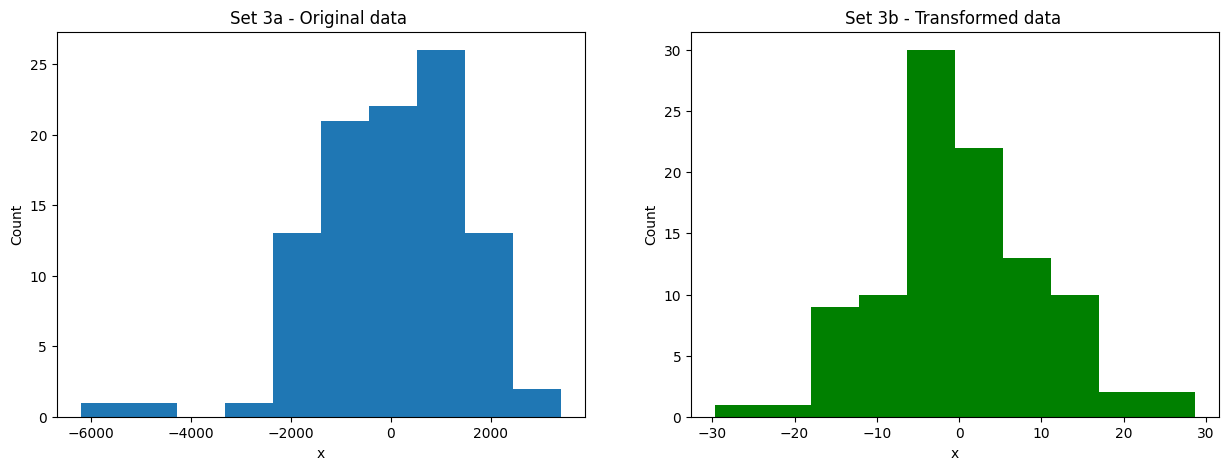

In [74]:
# Calculate the residuals
df3['sqrt_y_residuals'] = df3['sqrt_y_predicted'] - df3['sqrt_y']
df3['y_residuals'] = df3['y_predicted'] - df3['Y']

# Histogram of the residuals
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.hist(df3.y_residuals)
ax1.set_xlabel('x')
ax1.set_ylabel('Count')
ax1.set_title("Set 3a - Original data ");

ax2.hist(df3.sqrt_y_residuals,color="green")
ax2.set_xlabel('x')
ax2.set_ylabel('Count')
ax2.set_title("Set 3b - Transformed data ");

df3['sqrt_y_residuals'].describe()

For the transformed data set 3b, the residuals seem to be distributed normally. The prediction error ranges from -29.67, to 28.74. Residuals' mean and median are close to zero. Taken together, the transformed model seems to be valid, and suffers by a very little bias.

### 3.8 Plot regression results against one regressor.

This plots four graphs in a 2 by 2 figure:
- ‘endog versus exog’
- ‘residuals versus exog’
- ‘fitted versus exog’
- ‘fitted plus residual versus exog’

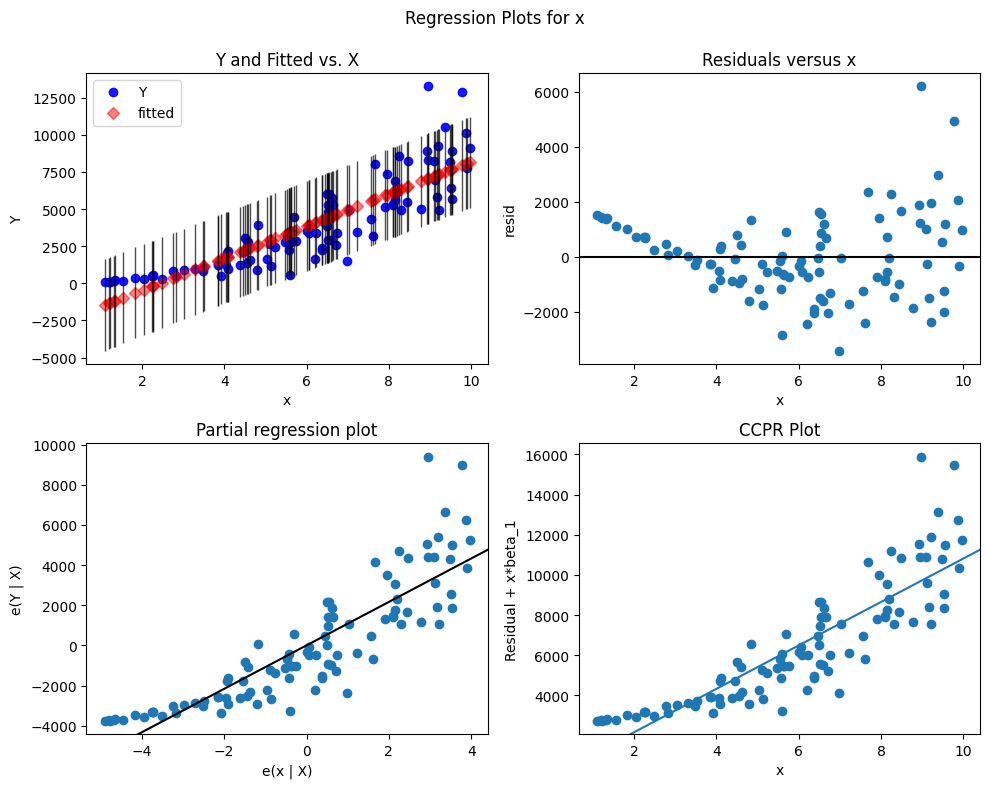

In [75]:
fig = plt.figure(figsize=(10,8));
fig = plot_regress_exog(results3a, "x", fig = fig);

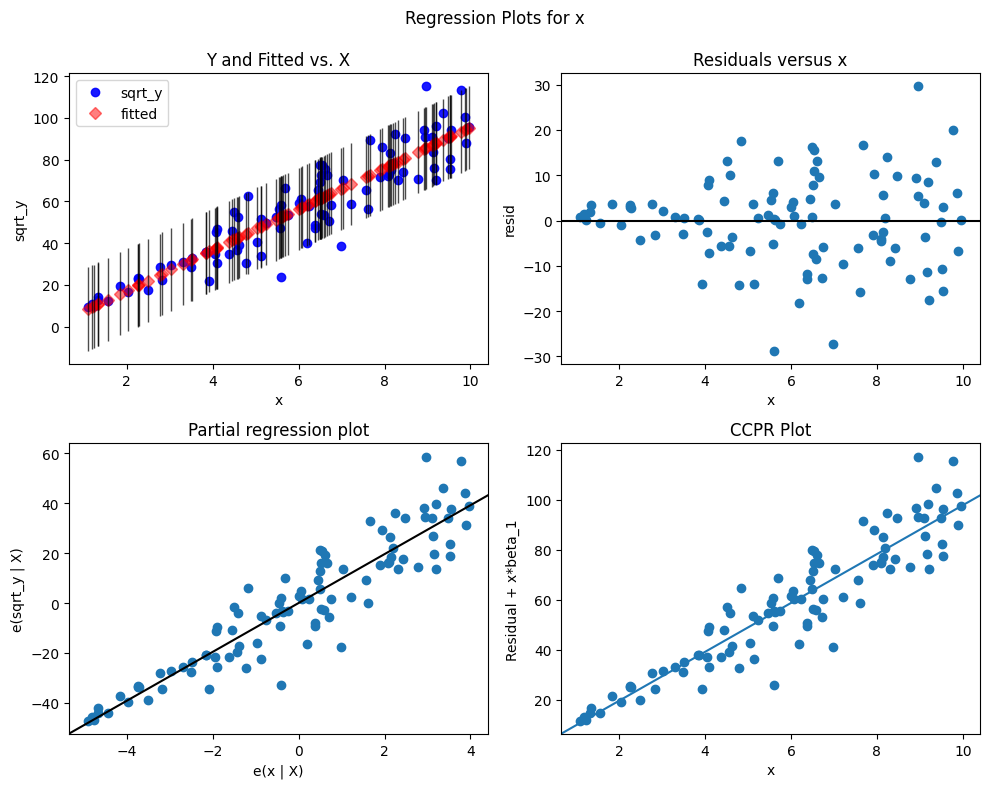

In [76]:
fig = plt.figure(figsize=(10,8));
fig = plot_regress_exog(results3b, "x", fig = fig);

Inspecting the leverage of individual residuals:

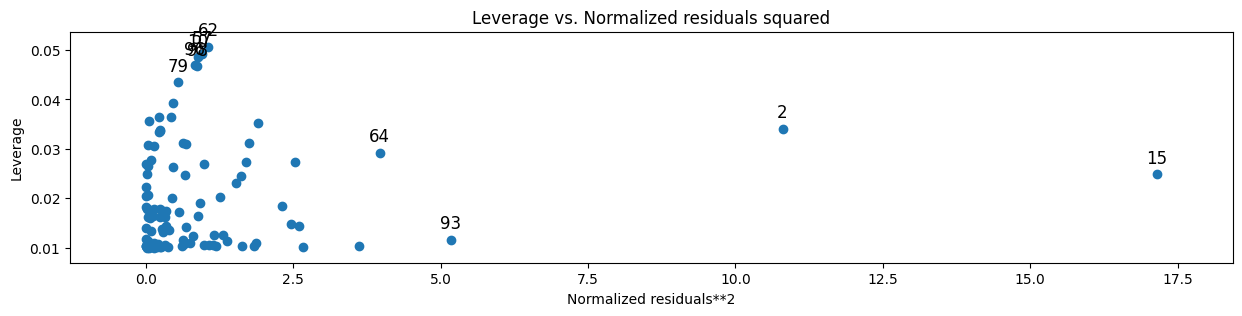

In [77]:
fig, ax = plt.subplots(figsize=(15,3))
fig = plot_leverage_resid2(results3a, ax=ax)

For the original model, we can see that generally the residual are skewed towards some leverage.

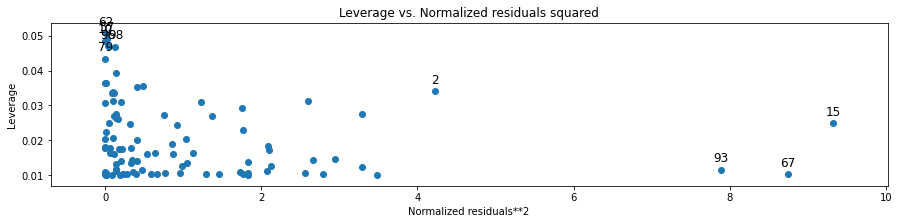

In [24]:
fig, ax = plt.subplots(figsize=(15,3))
fig = plot_leverage_resid2(lm3b, ax=ax)

For the transformed model, we can see that generally the greater the residual lower the leverage.

To get a better picture, plotting the influence plot of the individual observations:

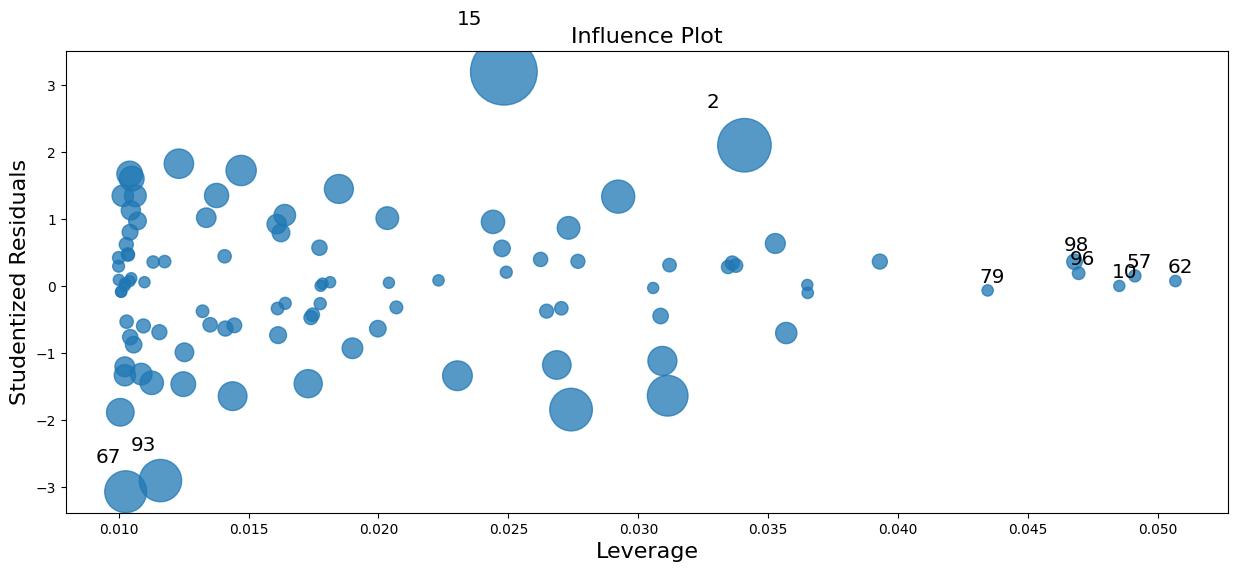

In [78]:
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(results3b, ax=ax)

For the original model, this plot highlights how influential individual observations are, i.e. highlight the observation with great residuals yet with great leverage. Since there are studentized residuals larger than 3, this indicates there are outliers with high leverage. 

### 3.10 Influence plot

To get a better picture, plotting the influence plot of the individual observations:

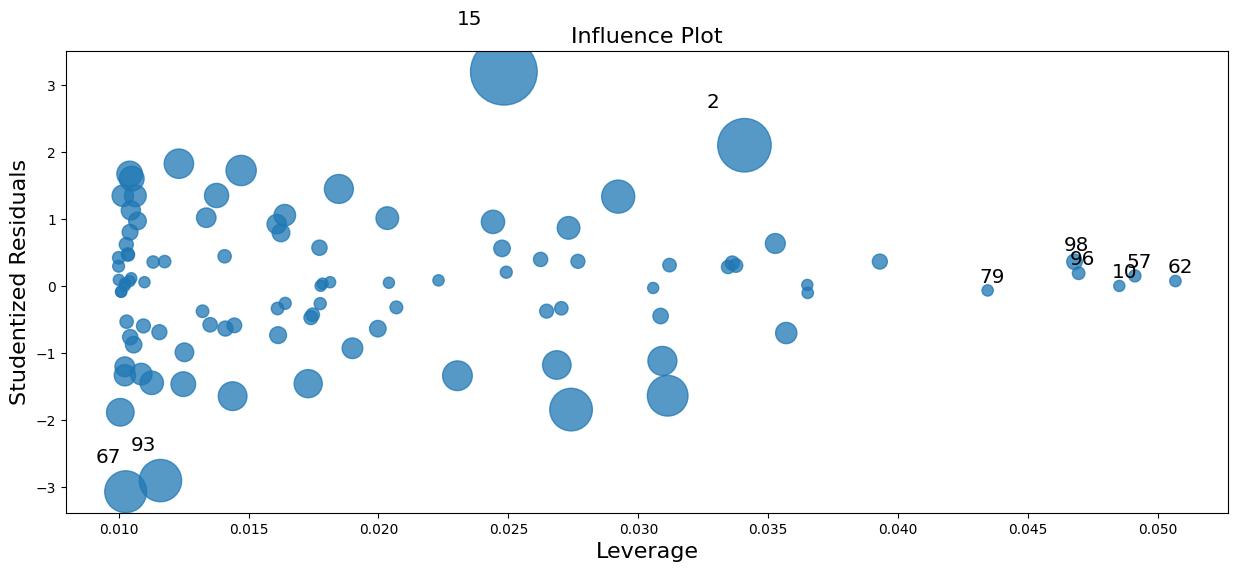

In [79]:
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(results3b, ax=ax)

For the transformed model, this plot highlights how influential individual observations are, i.e. highlight the observation with great residuals yet with great leverage. Since there are no studentized residuals larger than 3 or smaller than -3, this indicates there are no outliers with high leverage. Visual inspection is sucessfully done.

### 3.11 Inspecting the regression output and also RMSE:

In [80]:
rmse3b = rmse(df3.sqrt_y, df3.sqrt_y_predicted)
nrmse3b = rmse3b / df3.sqrt_y.mean()
print('RMSE = %f' % rmse3b)
print('NRMSE = %f' % nrmse3b)

results3b.summary()

RMSE = 9.715132
NRMSE = 0.171926


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sqrt_y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     588.0
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           3.37e-43
Time:                        01:01:57   Log-Likelihood:                -369.26
No. Observations:                 100   AIC:                             742.5
Df Residuals:                      98   BIC:                             747.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2001      2.612     -0.842      0.402      -7.384       2.984
x              9.7861      0.404     24.249      0.000       8.985      10.587
==============================================================================
Omnibus:                        2.926   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                2.648
Skew:                          -0.150   Prob(JB):                        0.266
Kurtosis:                       3.739   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The obtaned regression slope is positive (9.79), and the associated p-value is zero. This indicates very significant positive association between x and sqrt_y.

The obtained regression intercept is -2.2. Since the model is linear, i.e. the square-root of the expected value when the x variable is zero is -2.2. Therefore, in the original model, squaring it back gives intercept = 4.84.

R-squared from the model is 0.857, which means the x variable can explain only approximately 85.7% of the total variance of the sqrt_y variable. This is a high fraction, and it means that x is sufficient to accurately predict sqrt_y 85% the time.

The obtained RMSE is approximately 9.72, which means that on average our predictions are off by 9.72, which is approximately 17.2% of the average sqrt_y data in our dataset.

## Set 4
***

### 4.1 Create a scatter plot

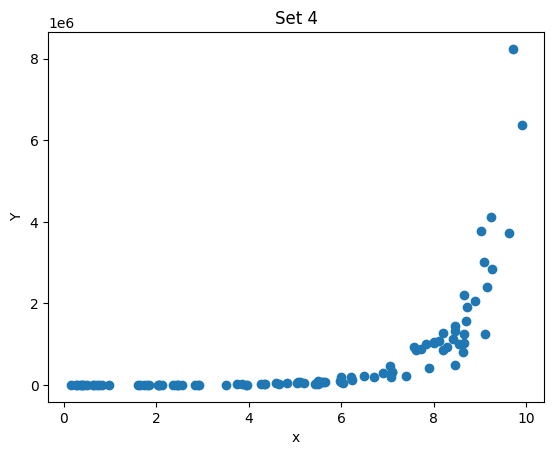

In [81]:
df4 = data_set[3]
plt.scatter(df4.x, df4.Y,marker="o")
plt.title("Set 4")
plt.xlabel("x")
plt.ylabel("Y")
plt.show()

By visual inspection, the scatterplot shows an exponential relationship between x and Y and therefore linear model is not appropriate.

### 4.2 If the relation is not linear, transform the data accordingly:

Since the relationship is exponential, the sensible approach for linear transformation is to reduce the exponent of y variable by log-scaling it.

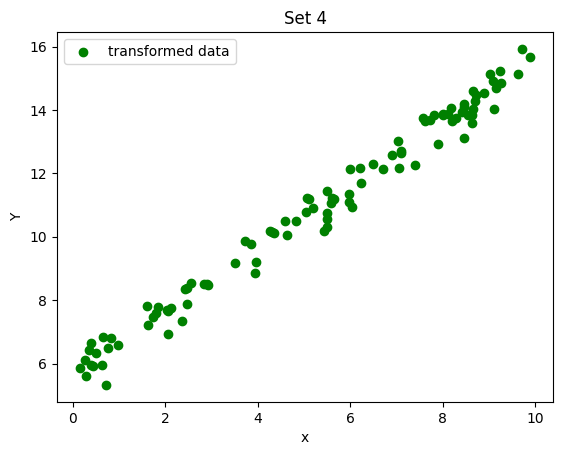

In [82]:
df4['log_y'] = np.log(df4.Y)
plt.scatter(df4.x, df4.log_y,marker="o",color='green',label="transformed data");
plt.title("Set 4")
plt.xlabel("x")
plt.ylabel("Y")
plt.legend()
plt.show()

Now, the scatter plot appears more linear than in its raw form.

### 4.3 Create an OLS model for the original and transformed data if required:
1. Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate.
2. Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
3. If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)

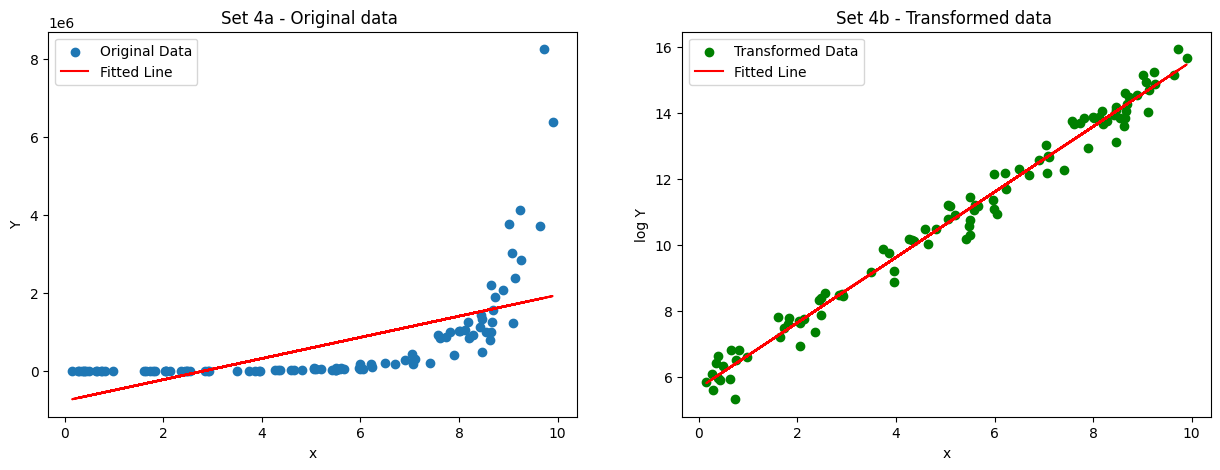

In [83]:
# OLS Regression

# Original data
lm4a = sm.ols('Y ~ x', data = df4)
results4a = lm4a.fit()
intercept, slope = results4a.params
df4['y_predicted'] = intercept + slope * df4.x

# Transformed data
lm4b = sm.ols('log_y ~ x', data = df4)
results4b = lm4b.fit()
intercept, slope = results4b.params
df4['log_y_predicted'] = intercept + slope * df4.x

# Add regression line
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.scatter(df4.x, df4.Y,marker="o",label='Original Data')
ax1.plot(df4.x, df4.y_predicted , 'r-', label='Fitted Line');
ax1.set_title("Set 4a - Original data ");
ax1.set_xlabel("x")
ax1.set_ylabel("Y")
ax1.legend()

ax2.scatter(df4.x, df4.log_y,marker="o",color='green',label='Transformed Data')
ax2.plot(df4.x, df4.log_y_predicted , 'r-', label='Fitted Line');
ax2.set_title("Set 4b - Transformed data ");
ax2.set_xlabel("x")
ax2.set_ylabel("log Y")
ax2.legend();

### 4.4 Residuals

Set 4a shows the original data with its fitted OLS regression. In Set 4b, the regression line goes approximately through the center of the transformed points cloud, and approximately one half of them lies above the regression line and another half lies below. This indicate valid regression. To better asses the resulting model, the residuals will be inspected:

count    1.000000e+02
mean     1.225686e-15
std      3.853615e-01
min     -6.403407e-01
25%     -2.803581e-01
50%     -4.510877e-02
75%      1.901438e-01
max      1.057768e+00
Name: log_y_residuals, dtype: float64

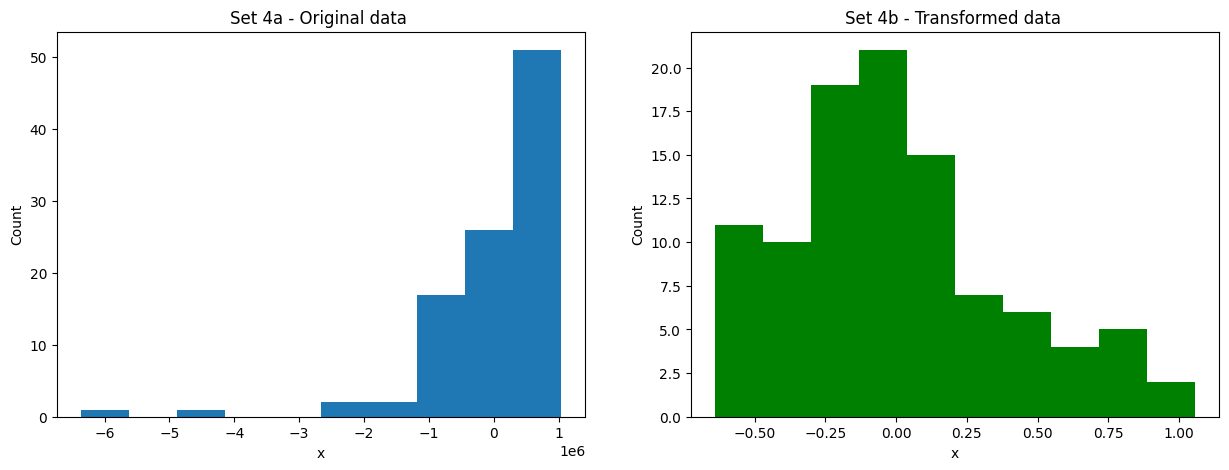

In [84]:
# Calculate the residuals
df4['log_y_residuals'] = df4['log_y_predicted'] - df4['log_y']
df4['y_residuals'] = df4['y_predicted'] - df4['Y']

# Histogram of the residuals
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.hist(df4.y_residuals)
ax1.set_xlabel('x')
ax1.set_ylabel('Count')
ax1.set_title("Set 4a - Original data ");

ax2.hist(df4.log_y_residuals,color="green")
ax2.set_xlabel('x')
ax2.set_ylabel('Count')
ax2.set_title("Set 4b - Transformed data ");

df4['log_y_residuals'].describe()

For the transformed data set 3b, the residuals seem to be roughly distributed normally. The prediction error ranges from -0.64, to 1.06. Residuals' mean and median are close to zero. Taken together, the transformed model seems to be valid, and suffers by a very little bias.

### 4.5 Plot regression results against one regressor.

This plots four graphs in a 2 by 2 figure:
- ‘endog versus exog’
- ‘residuals versus exog’
- ‘fitted versus exog’
- ‘fitted plus residual versus exog’

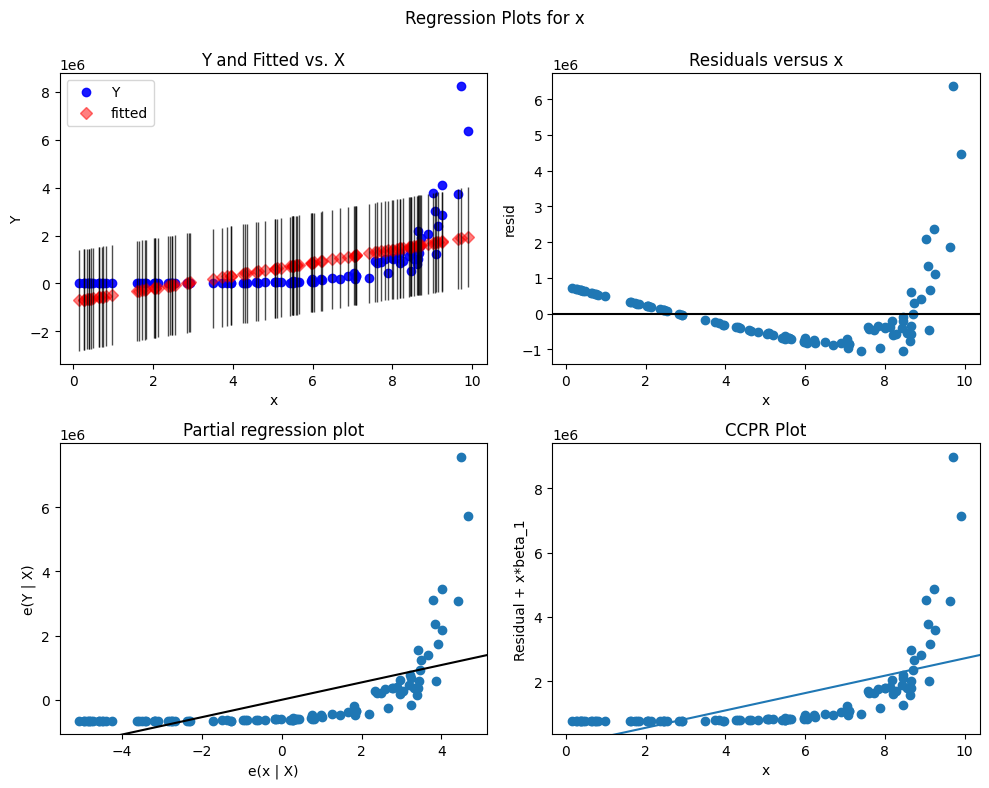

In [85]:
fig = plt.figure(figsize=(10,8));
fig = plot_regress_exog(results4a, "x", fig = fig);

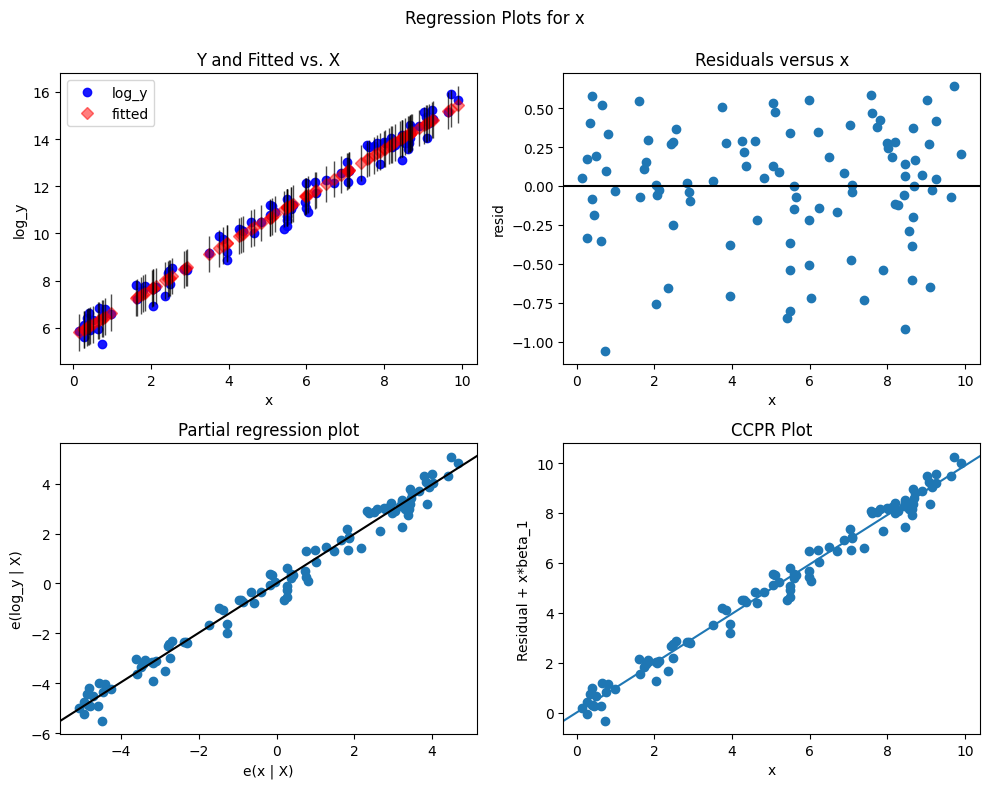

In [86]:
fig = plt.figure(figsize=(10,8));
fig = plot_regress_exog(results4b, "x", fig = fig);

Inspecting the leverage of individual residuals:

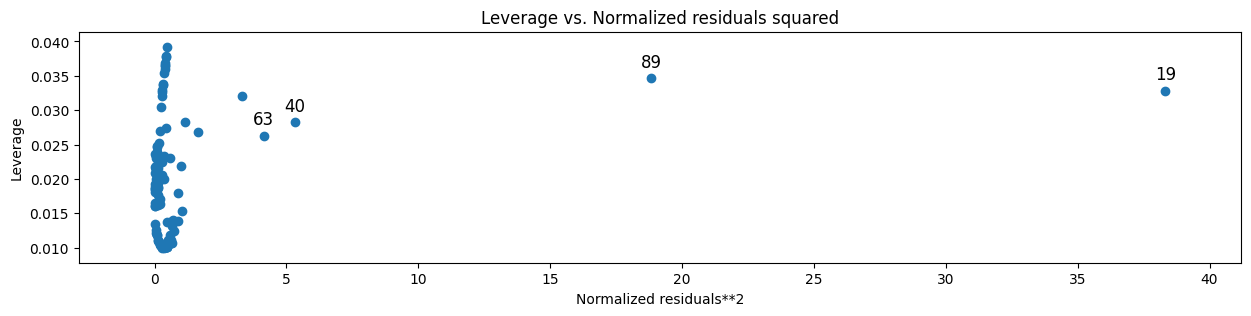

In [87]:
fig, ax = plt.subplots(figsize=(15,3))
fig = plot_leverage_resid2(results4a, ax=ax)

For the original model, we can see that generally the residual are skewed towards high leverage points.

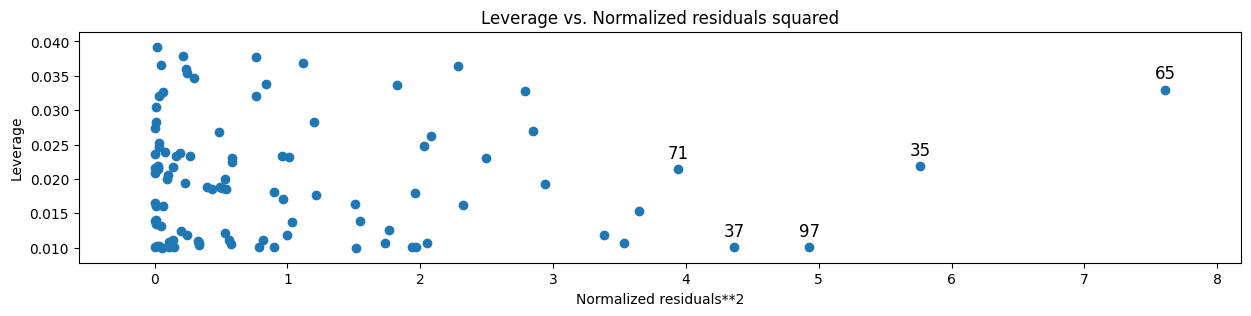

In [88]:
fig, ax = plt.subplots(figsize=(15,3))
fig = plot_leverage_resid2(results4b, ax=ax)

For the transformed model, we can see that generally the greater the residual lower the leverage (except for data point # 65 which appears to show some leveraging strength).

To get a better picture, plotting the influence plot of the individual observations:

### 4.6 Influence plot

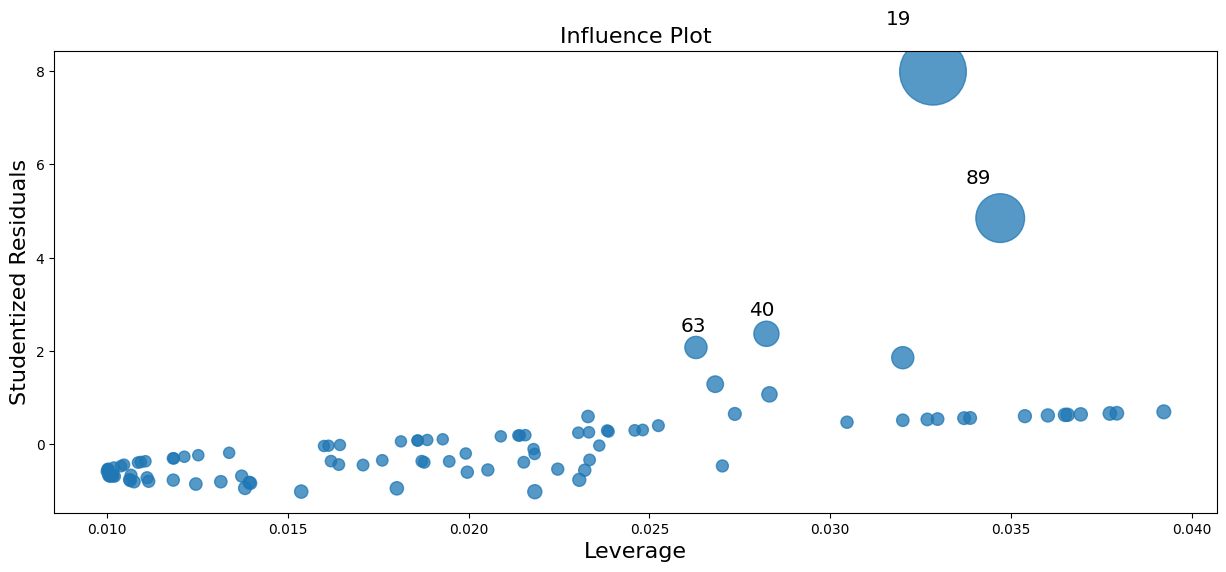

In [89]:
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(results4a, ax=ax)

For the original model, this plot highlights how influential individual observations are, i.e. highlight the observation with great residuals yet with great leverage. Since there are studentized residuals larger than 3, this indicates there are outliers with high leverage.

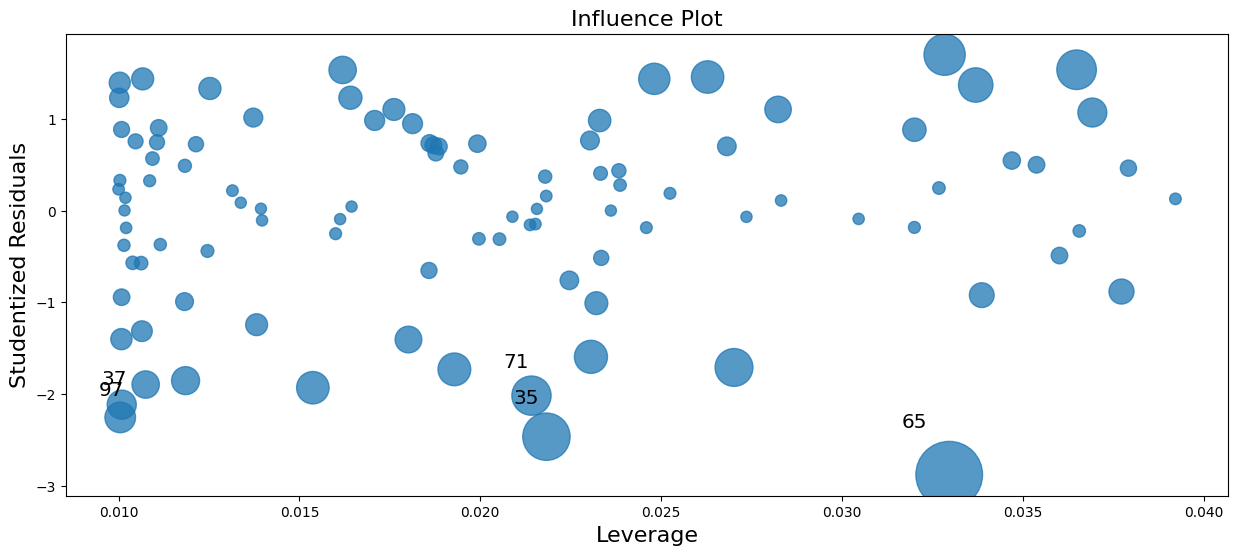

In [90]:
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(results4b, ax=ax)

For the transformed model, this plot highlights how influential individual observations are, i.e. highlight the observation with great residuals yet with great leverage. Since there are no studentized residuals larger than 3 or smaller than -3, this indicates there are no outliers with high leverage. Visual inspection is sucessfully done.

### 4.7 Inspecting the regression output and also RMSE:

In [91]:
rmse4b = rmse(df4.log_y, df4.log_y_predicted)
nrmse4b = rmse4b / df4.log_y.mean()
print('RMSE = %f' % rmse4b)
print('NRMSE = %f' % nrmse4b)

results4b.summary()

RMSE = 0.383430
NRMSE = 0.035373


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           6.91e-89
Time:                        01:05:58   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6647      0.078     72.264      0.000       5.509       5.820
x              0.9898      0.013     75.930      0.000       0.964       1.016
==============================================================================
Omnibus:                        7.020   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.256
Skew:                          -0.657   Prob(JB):                       0.0266
Kurtosis:                       2.872   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The obtaned regression slope is positive (0.9898), and the associated p-value is zero. This indicates very significant positive association between x and log_y.

The obtained regression intercept is 5.67. Since the model is linear, i.e. the log of the expected value when the x variable is zero is 5.67. Therefore, in the original model, antilogging it back gives intercept = 4.68e+05.

R-squared from the model is 0.983, which means the x variable can explain only approximately 98.3% of the total variance of the log_y variable. This is a high fraction, and it means that x is sufficient to accurately predict log_y 98% the time.

The obtained RMSE is approximately 0.383, which means that on average our predictions are off by 0.383, which is approximately 0.35% of the average log_y data in our dataset.

## Set 5
***

### 5.1 Create a scatter plot

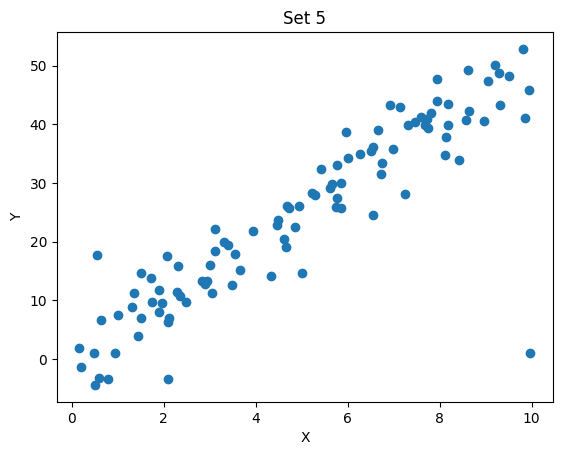

In [92]:
df5 = data_set[4]
plt.scatter(df5.X, df5.Y,marker="o")
plt.title("Set 5")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

By visual inspection, the scatterplot shows a linear relationship between x and Y because as one variable increases, the other variable also increases approximately at the same rate. However, there is obviously a few outliers noticed.

### 5.2 If the relation is not linear, transform the data accordingly:

Transformation is not required.

### 5.3 Create an OLS model for the original and transformed data if required:
1. Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate.
2. Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
3. If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)

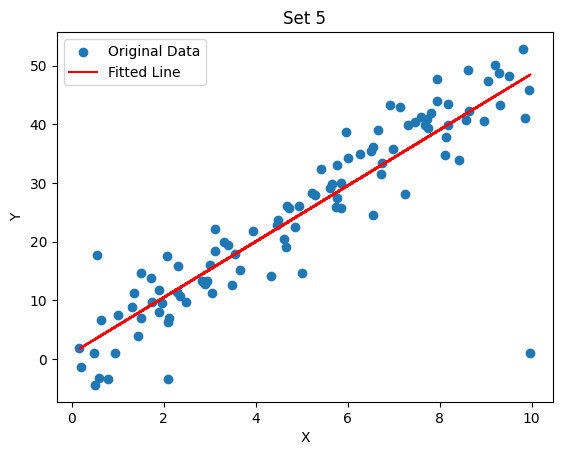

In [93]:
# Initialize the regression model
lm5 = sm.ols('Y ~ X', data = df5)
results5 = lm5.fit()

# Extract regression parameters from the model
intercept, slope = results5.params

# Predict y
df5['y_predicted'] = intercept + slope * df5.X

# Add regression line
plt.scatter(df5.X, df5.Y,marker="o",label='Original Data')
plt.plot(df5.X, df5.y_predicted , 'r-', label='Fitted Line');
plt.title("Set 5")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

As can be seen, the regression line goes approximately through the center of the points cloud, and approximately one half of the points lies above the regression line and another half lies below. This indicate valid regression.

### 5.4 Residuals

count    1.010000e+02
mean     1.428121e-14
std      6.666383e+00
min     -1.403782e+01
25%     -3.542946e+00
50%     -1.164350e+00
75%      2.449717e+00
max      4.742030e+01
Name: y_residuals, dtype: float64

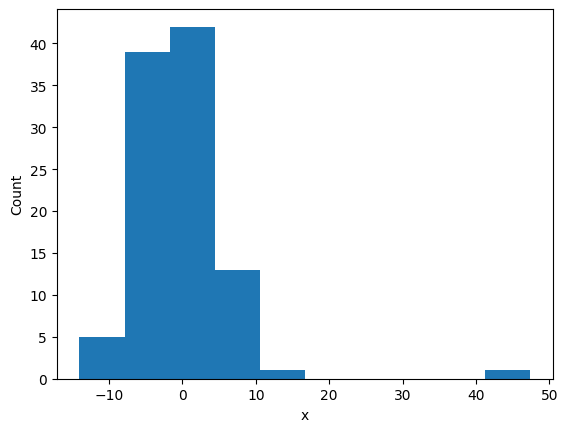

In [94]:
# Calculate the residuals
df5['y_residuals'] = df5['y_predicted'] - df5['Y']

# Histogram of the residuals
residuals_hist = plt.hist(df5.y_residuals)
plt.xlabel('x')
plt.ylabel('Count')

# Statistical summary of the residuals
df5['y_residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -14.0, to 47.4. Residuals' mean and is close to zero however the median is at -1.16 (possibly due to outliers). However, in such case aken together, the model seems to be valid but suffers moderate bias.

### 5.5 Plot regression results against one regressor.

This plots four graphs in a 2 by 2 figure:
- ‘endog versus exog’
- ‘residuals versus exog’
- ‘fitted versus exog’
- ‘fitted plus residual versus exog’

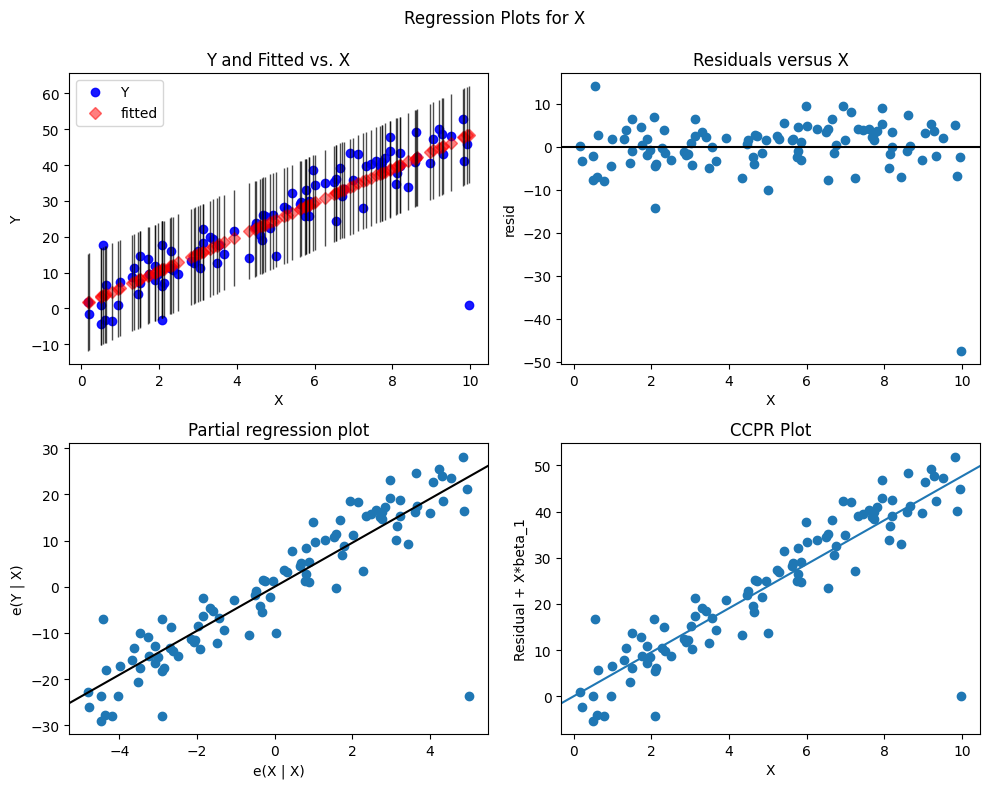

In [95]:
fig = plt.figure(figsize=(10,8));
fig = plot_regress_exog(results5, "X", fig = fig);

Inspecting the leverage of individual residuals:

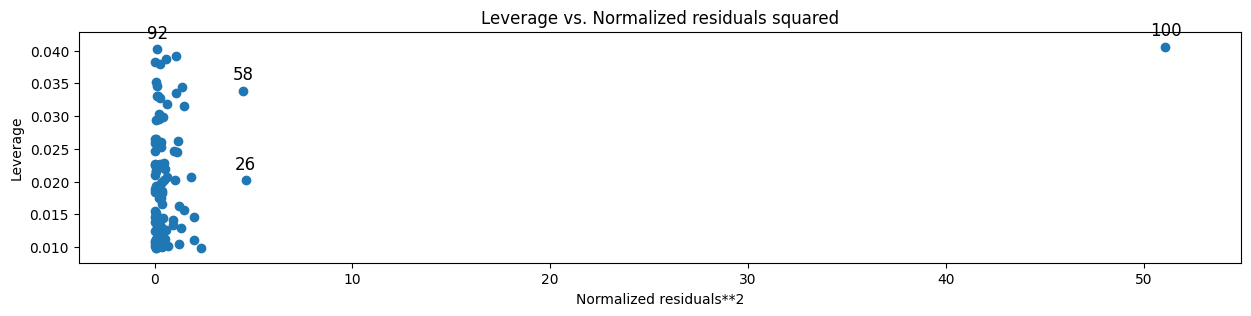

In [96]:
fig, ax = plt.subplots(figsize=(15,3))
fig = plot_leverage_resid2(results5, ax=ax)

As we can see, there is one influential point with high leverage.

### 5.6 Influence plot
To get a better picture, plotting the influence plot of the individual observations:

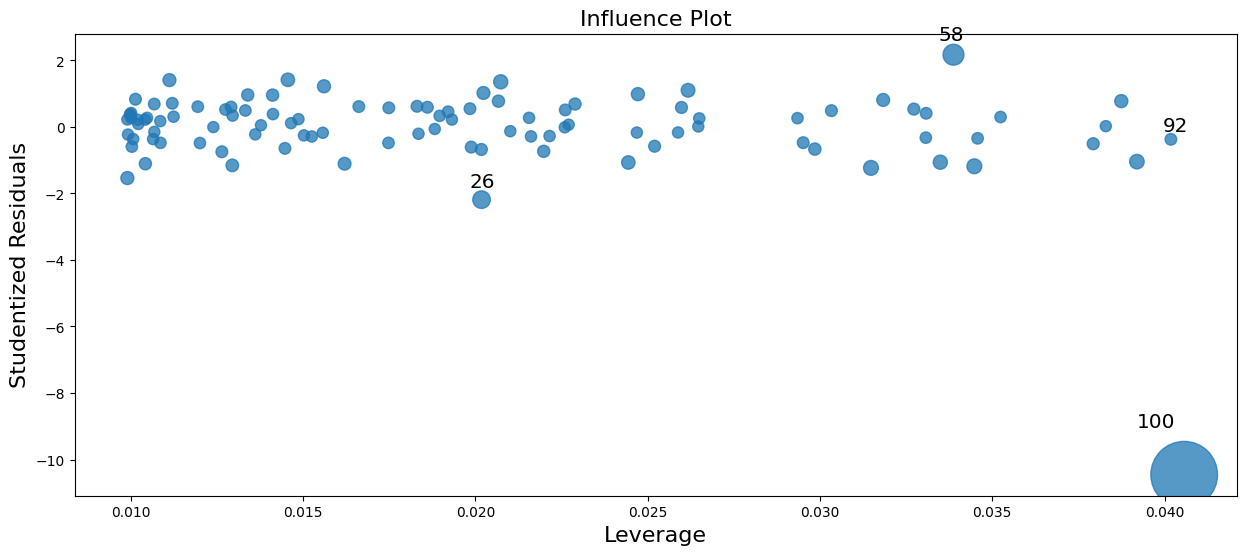

In [98]:
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(results5, ax=ax)

This plot highlights how influential individual observations are, i.e. highlight the observation with great residuals yet with great leverage. There is only one studentized residual (data point #100) larger than 3 and this indicates that is an outlier with high leverage. Visual inspection is sucessfully done.

### 5.7 Inspecting the regression output and also RMSE:

In [99]:
rmse5 = rmse(df5.Y, df5.y_predicted)
nrmse5 = rmse5 / df5.Y.mean()
print('RMSE = %f' % rmse5)
print('NRMSE = %f' % nrmse5)

results5.summary()

RMSE = 6.633299
NRMSE = 0.269201


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           4.70e-37
Time:                        01:08:47   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.495      -1.749       3.591
X              4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The obtaned regression slope is positive (4.76), and the associated p-value is zero. This indicates very significant positive association between X and Y.

The obtained regression intercept is 0.921. Since the model is linear, i.e. the expected value when the x variable is zero is 0.921.

R-squared from the model is 0.806, which means the x variable can explain only approximately 81% of the total variance of the y variable. This is a very big fraction, and it means that x is sufficient to accurately predict y.

The obtained RMSE is approximately 6.63, which means that on average our predictions are off by 6.63, which is approximately 26.9% of the average y data in our dataset.

### 5.8 Removing the outliers and see the effect in the model (slope, intercept and R-square):

Outlier is identified as Data Point # 100. 

#### 5.8.1 Create a scatter plot

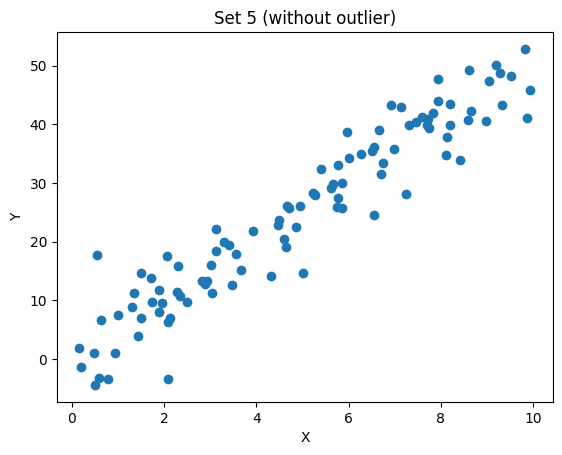

In [100]:
df5.drop(df5.iloc[100].name, inplace=True)

plt.scatter(df5.X, df5.Y,marker="o")
plt.title("Set 5 (without outlier)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### 5.8.2 OLS

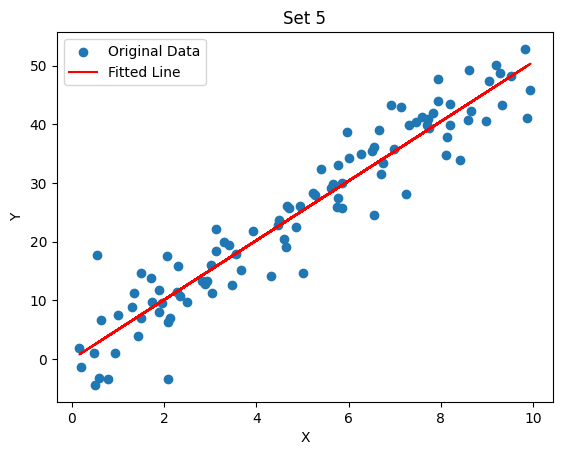

In [101]:
# Initialize the regression model
lm5_outlier = sm.ols('Y ~ X', data = df5)
results5_outlier = lm5_outlier.fit()

# Extract regression parameters from the model
intercept, slope = results5_outlier.params

# Predict y
df5['y_predicted'] = intercept + slope * df5.X

# Add regression line
plt.scatter(df5.X, df5.Y,marker="o",label='Original Data')
plt.plot(df5.X, df5.y_predicted , 'r-', label='Fitted Line');
plt.title("Set 5")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

#### 5.8.3 Residuals

count    1.000000e+02
mean    -7.993606e-17
std      4.605988e+00
min     -1.488861e+01
25%     -2.700744e+00
50%     -6.205125e-01
75%      2.993591e+00
max      1.384320e+01
Name: y_residuals, dtype: float64

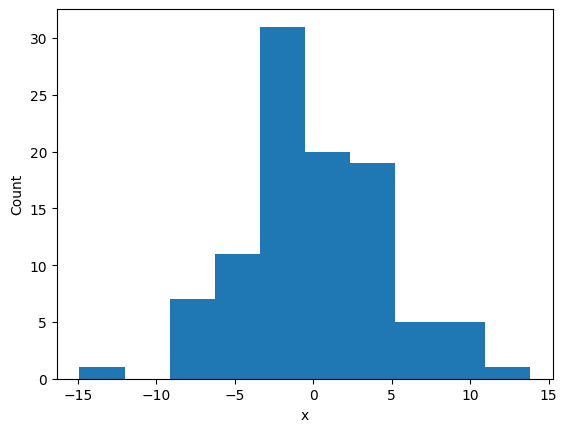

In [102]:
# Calculate the residuals
df5['y_residuals'] = df5['y_predicted'] - df5['Y']

# Histogram of the residuals
residuals_hist = plt.hist(df5.y_residuals)
plt.xlabel('x')
plt.ylabel('Count')

# Statistical summary of the residuals
df5['y_residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -14.9, to 13.9 Residuals' mean and median are close to zero (without outliers). Taken together, the model seems to be valid and suffers little bias.

#### 5.8.4 Plot regression results against one regressor.

This plots four graphs in a 2 by 2 figure:
- ‘endog versus exog’
- ‘residuals versus exog’
- ‘fitted versus exog’
- ‘fitted plus residual versus exog’

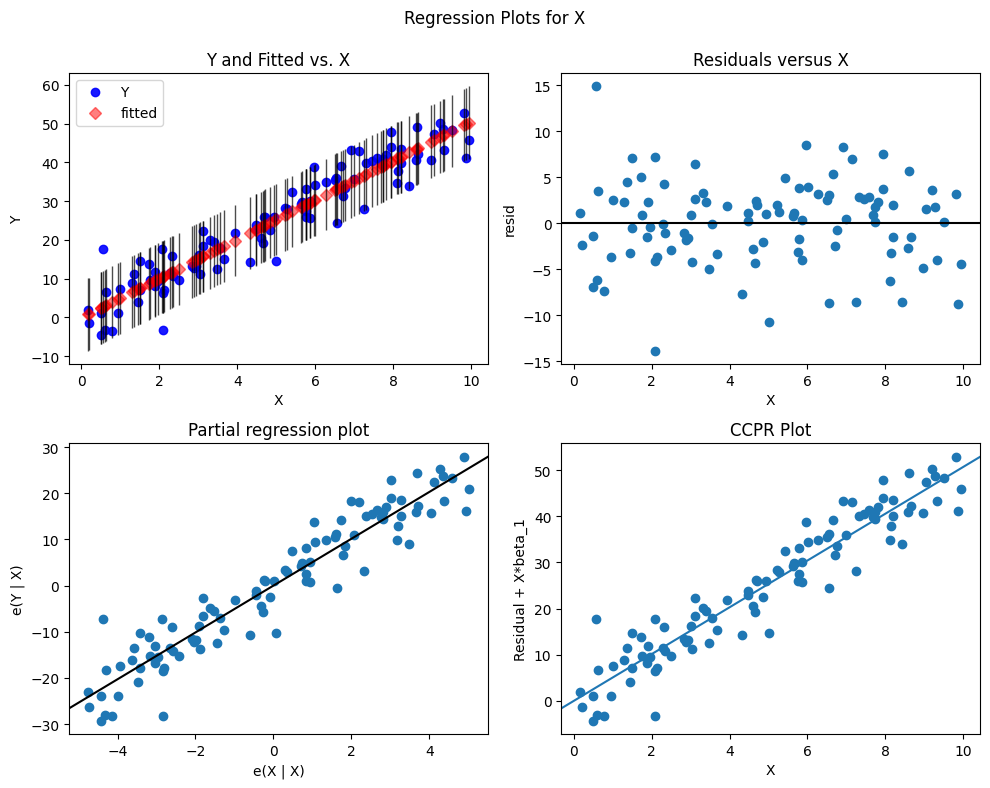

In [103]:
fig = plt.figure(figsize=(10,8));
fig = plot_regress_exog(results5_outlier, "X", fig = fig);

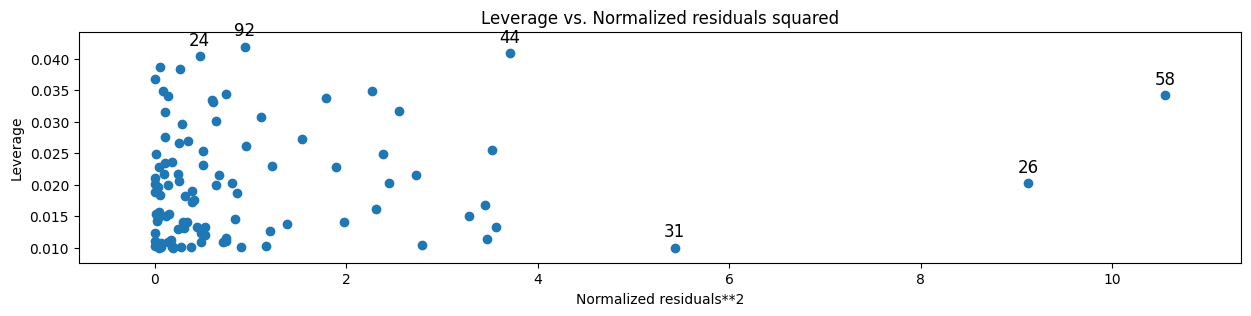

In [104]:
fig, ax = plt.subplots(figsize=(15,3))
fig = plot_leverage_resid2(results5_outlier, ax=ax)

#### 5.8.5 Influence plot

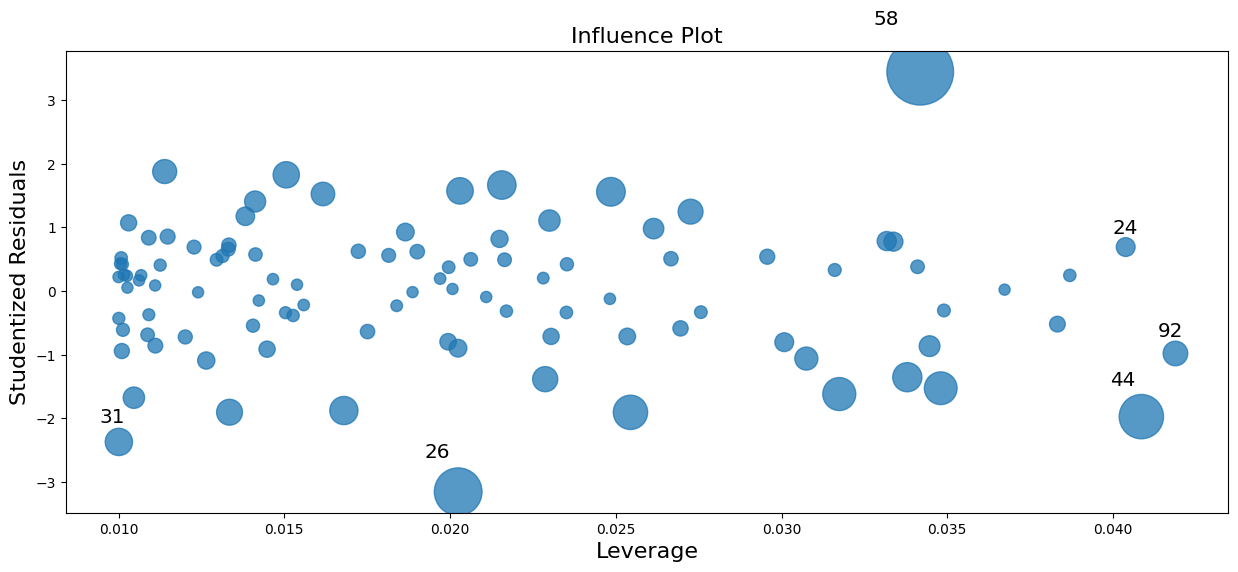

In [105]:
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(results5_outlier, ax=ax)

This plot highlights how influential individual observations are, i.e. highlight the observation with great residuals yet with great leverage. There is no studentized residual larger than 3 or smaller than -3 and this indicates that is no outlier with high leverage. Visual inspection is sucessfully done.

#### 5.8.6 Inspecting the regression output and also RMSE:

In [106]:
rmse5 = rmse(df5.Y, df5.y_predicted)
nrmse5 = rmse5 / df5.Y.mean()
print('RMSE = %f' % rmse5)
print('NRMSE = %f' % nrmse5)

results5_outlier.summary()

RMSE = 4.582900
NRMSE = 0.184224


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     945.8
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           3.84e-52
Time:                        01:11:46   Log-Likelihood:                -294.13
No. Observations:                 100   AIC:                             592.3
Df Residuals:                      98   BIC:                             597.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0993      0.935     -0.106      0.916      -1.954       1.756
X              5.0705      0.165     30.753      0.000       4.743       5.398
==============================================================================
Omnibus:                        3.022   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.760
Skew:                          -0.158   Prob(JB):                        0.252
Kurtosis:                       3.750   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The obtaned regression slope is positive (5.07), and the associated p-value is zero. This indicates very significant positive association between X and Y.

The obtained regression intercept is -0.0993. Since the model is linear, i.e. the expected value when the x variable is zero is -0.0993.

R-squared from the model is 0.906, which means the x variable can explain only approximately 91% of the total variance of the y variable. This is a very big fraction, and it means that x is sufficient to accurately predict y.

The obtained RMSE is approximately 4.58, which means that on average our predictions are off by 4.58, which is approximately 18.4% of the average y data in our dataset.

## Set 6
***

### 6.1 Create a scatter plot

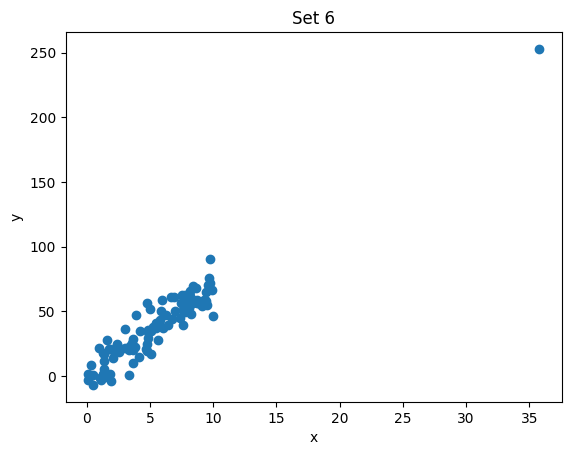

In [107]:
df6 = data_set[5]
plt.scatter(df6.x, df6.y,marker="o")
plt.title("Set 6")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

By visual inspection, the scatterplot shows a linear relationship between x and Y because as one variable increases, the other variable also increases approximately at the same rate. However, there is obviously one few outlier noticed.

### 6.2 If the relation is not linear, transform the data accordingly:

Transformation is not required.

### 6.3 Create an OLS model for the original and transformed data if required:
1. Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate.
2. Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
3. If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)

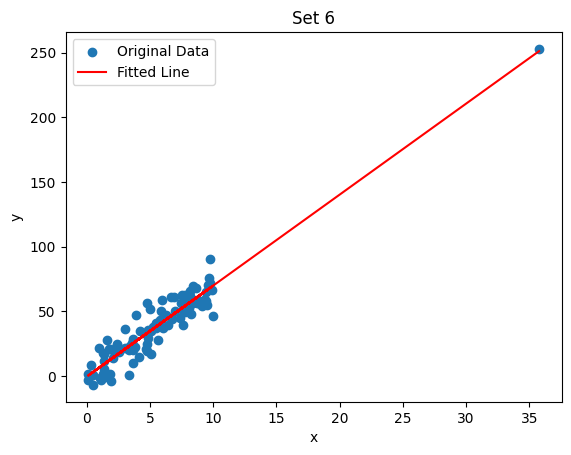

In [108]:
# Initialize the regression model
lm6 = sm.ols('y ~ x', data = df6)
results6 = lm6.fit()

# Extract regression parameters from the model
intercept, slope = results6.params

# Predict y
df6['y_predicted'] = intercept + slope * df6.x

# Add regression line
plt.scatter(df6.x, df6.y,marker="o",label='Original Data')
plt.plot(df6.x, df6.y_predicted , 'r-', label='Fitted Line');
plt.title("Set 6")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

As can be seen, the regression line goes approximately through the center of the points cloud, and approximately one half of the points lies above the regression line and another half lies below. This indicate valid regression.

### 6.4 Residuals

count    1.010000e+02
mean    -1.769322e-14
std      9.252081e+00
min     -2.329843e+01
25%     -5.543791e+00
50%      3.559015e-01
75%      5.103361e+00
max      2.305339e+01
Name: y_residuals, dtype: float64

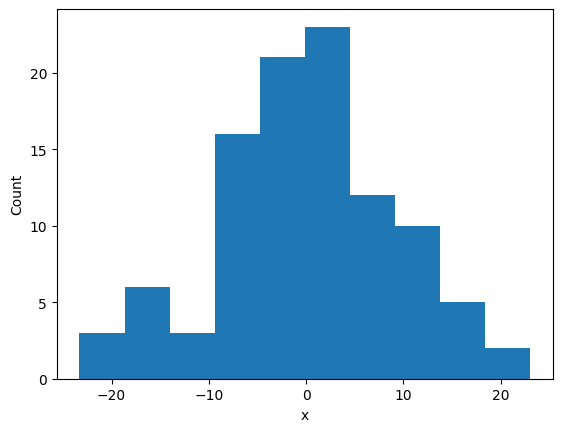

In [109]:
# Calculate the residuals
df6['y_residuals'] = df6['y_predicted'] - df6['y']

# Histogram of the residuals
residuals_hist = plt.hist(df6.y_residuals)
plt.xlabel('x')
plt.ylabel('Count')

# Statistical summary of the residuals
df6['y_residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -23.3, to 23.1. Residuals' mean and median is close to zero. Taken together, the model seems to be valid but suffers little bias.

### 6.5 Plot regression results against one regressor.

This plots four graphs in a 2 by 2 figure:
- ‘endog versus exog’
- ‘residuals versus exog’
- ‘fitted versus exog’
- ‘fitted plus residual versus exog’

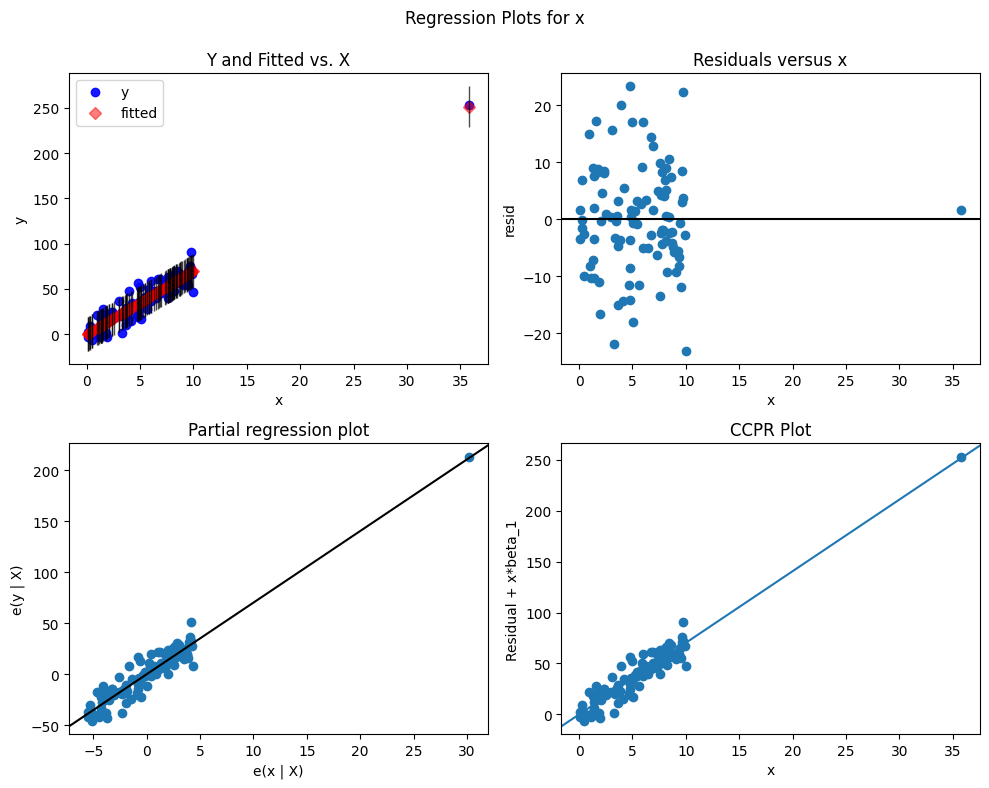

In [110]:
fig = plt.figure(figsize=(10,8));
fig = plot_regress_exog(results6, "x", fig = fig);

Inspecting the leverage of individual residuals:

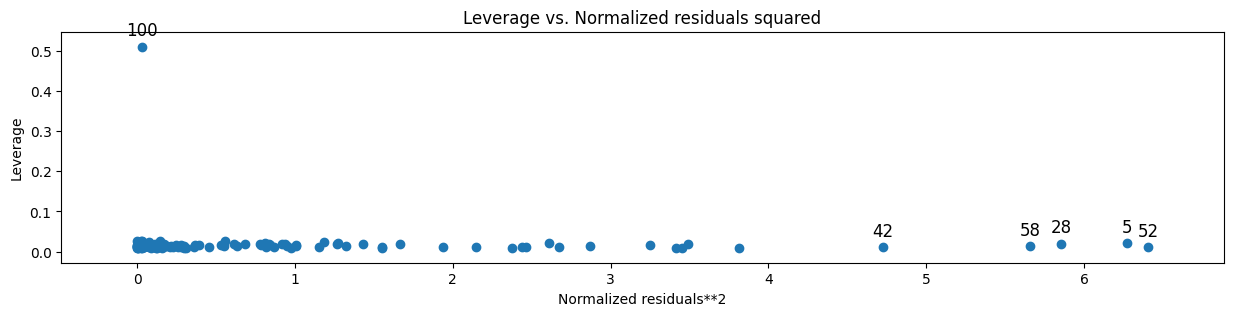

In [111]:
fig, ax = plt.subplots(figsize=(15,3))
fig = plot_leverage_resid2(results6, ax=ax)

As we can see, there is one influential point with high leverage.

To get a better picture, plotting the influence plot of the individual observations:

### 6.6 Influence plot

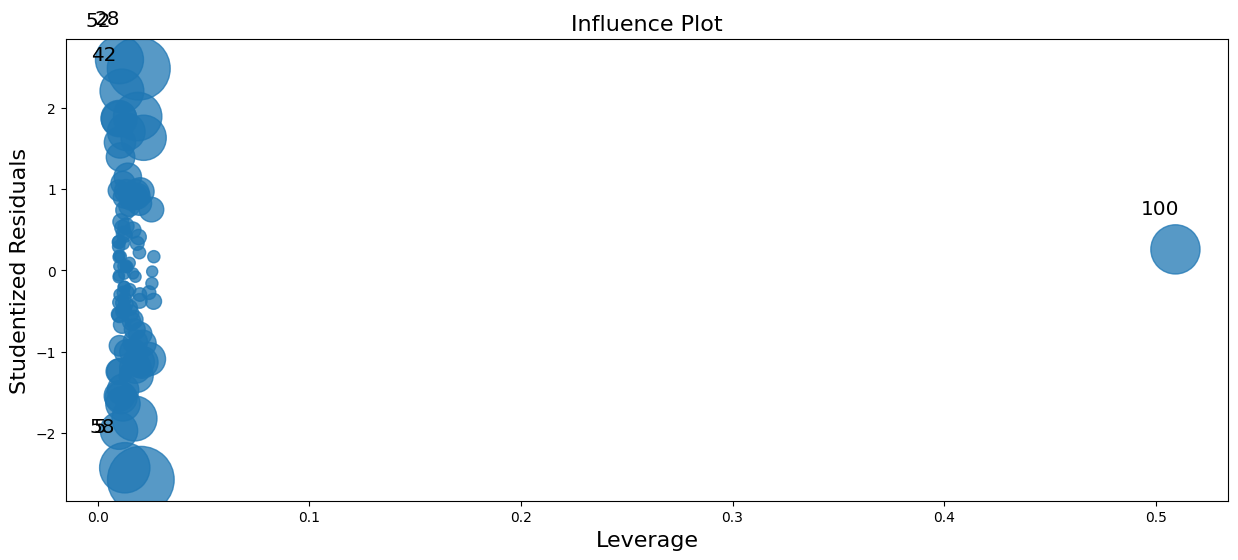

In [112]:
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(results6, ax=ax)

This plot highlights how influential individual observations are, i.e. highlight the observation with great residuals yet with great leverage. There is only one studentized residual (data point #100) larger than 3 and this indicates that is an outlier with high leverage. Visual inspection is sucessfully done.

### 6.7 Inspecting the regression output and also RMSE:

In [113]:
rmse6 = rmse(df6.y, df6.y_predicted)
nrmse6 = rmse6 / df6.y.mean()
print('RMSE = %f' % rmse6)
print('NRMSE = %f' % nrmse6)

results6.summary()

RMSE = 9.206165
NRMSE = 0.234982


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           2.49e-54
Time:                        01:14:04   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3059      1.534     -0.199      0.842      -3.350       2.739
x              7.0272      0.218     32.259      0.000       6.595       7.459
==============================================================================
Omnibus:                        0.494   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.262
Skew:                           0.120   Prob(JB):                        0.877
Kurtosis:                       3.070   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The obtaned regression slope is positive (7.03), and the associated p-value is zero. This indicates very significant positive association between x and y.

The obtained regression intercept is -0.306. Since the model is linear, i.e. the expected value when the x variable is zero is -0.306.

R-squared from the model is 0.913, which means the x variable can explain only approximately 91% of the total variance of the y variable. This is a very big fraction, and it means that x is sufficient to accurately predict y.

The obtained RMSE is approximately 9.21, which means that on average our predictions are off by 9.21, which is approximately 23.5% of the average y data in our dataset.

### 6.8 Removing the outliers and see the effect in the model (slope, intercept and R-square):

Outlier is identified as Data Point # 100. 

#### 6.8.1 Create a scatter plot

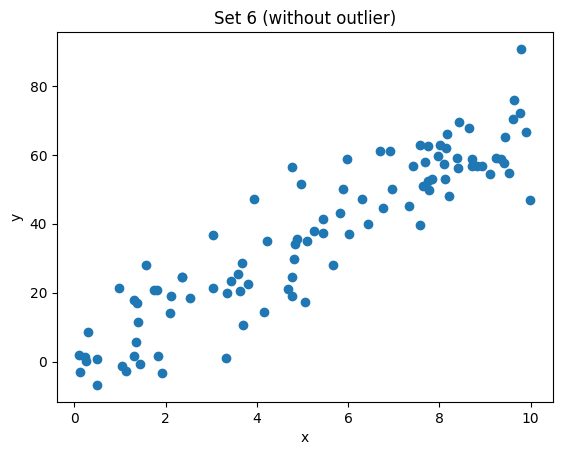

In [114]:
df6.drop(df6.iloc[100].name, inplace=True)

plt.scatter(df6.x, df6.y,marker="o")
plt.title("Set 6 (without outlier)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### 6.8.2 OLS

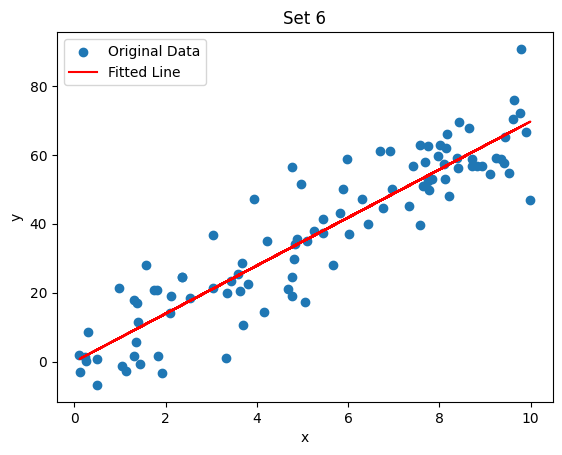

In [115]:
# Initialize the regression model
lm6 = sm.ols('y ~ x', data = df6).fit()

# Extract regression parameters from the model
intercept, slope = lm6.params

# Predict y
df6['y_predicted'] = intercept + slope * df6.x

# Add regression line
plt.scatter(df6.x, df6.y,marker="o",label='Original Data')
plt.plot(df6.x, df6.y_predicted , 'r-', label='Fitted Line');
plt.title("Set 6")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#### 6.8.3 Residuals

count    1.000000e+02
mean     1.126210e-14
std      9.295544e+00
min     -2.328386e+01
25%     -5.775247e+00
50%      4.739004e-01
75%      5.106210e+00
max      2.277057e+01
Name: y_residuals, dtype: float64

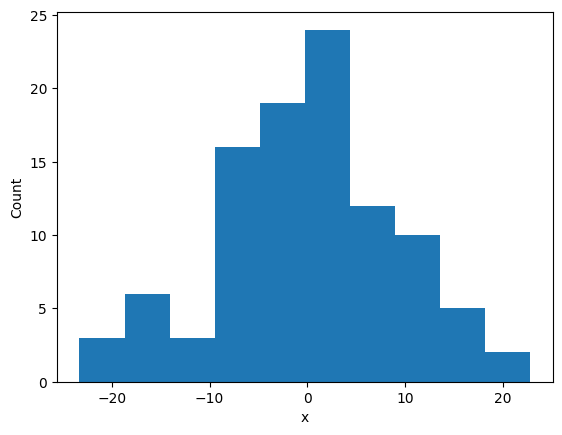

In [116]:
# Calculate the residuals
df6['y_residuals'] = df6['y_predicted'] - df6['y']

# Histogram of the residuals
residuals_hist = plt.hist(df6.y_residuals)
plt.xlabel('x')
plt.ylabel('Count')

# Statistical summary of the residuals
df6['y_residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -23.3, to 22.77. Residuals' mean and median is close to zero. Taken together, the model seems to be valid but suffers little bias.

#### 6.8.4 Plot regression results against one regressor.

This plots four graphs in a 2 by 2 figure:
- ‘endog versus exog’
- ‘residuals versus exog’
- ‘fitted versus exog’
- ‘fitted plus residual versus exog’

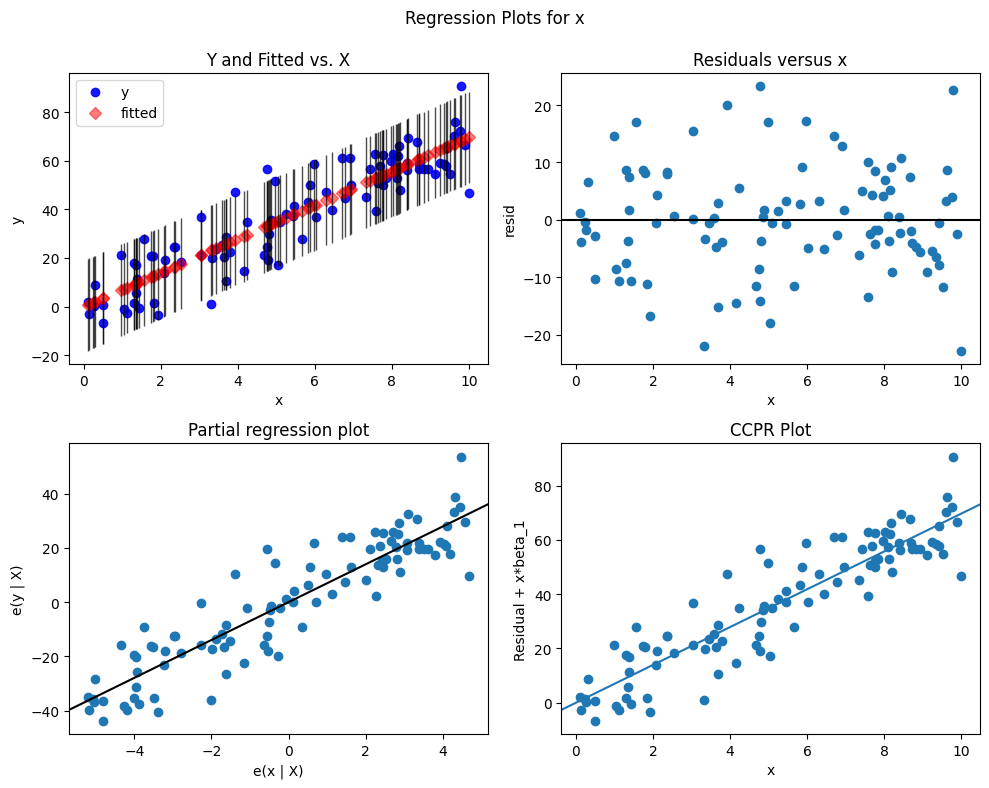

In [117]:
fig = plt.figure(figsize=(10,8));
fig = plot_regress_exog(lm6, "x", fig = fig);

Inspecting the leverage of individual residuals:

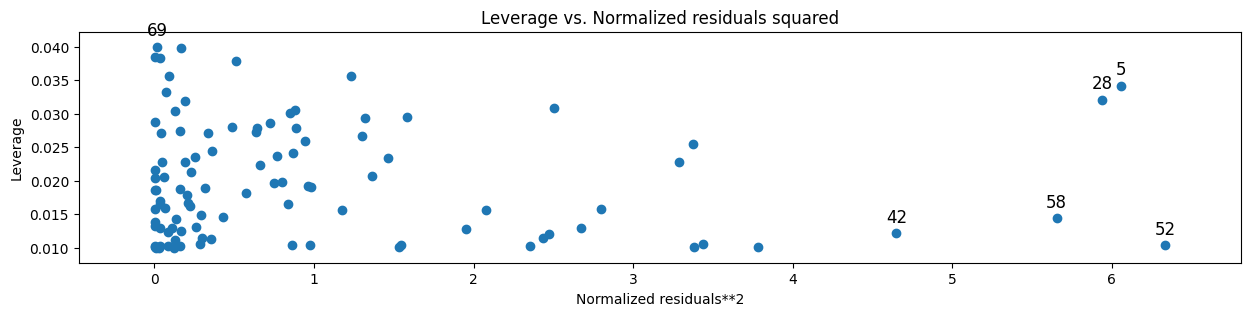

In [119]:
fig, ax = plt.subplots(figsize=(15,3))
fig = plot_leverage_resid2(lm6, ax=ax)

As we can see, there is no influential point with high leverage.

To get a better picture, plotting the influence plot of the individual observations:

#### 6.8.5 Influence plot

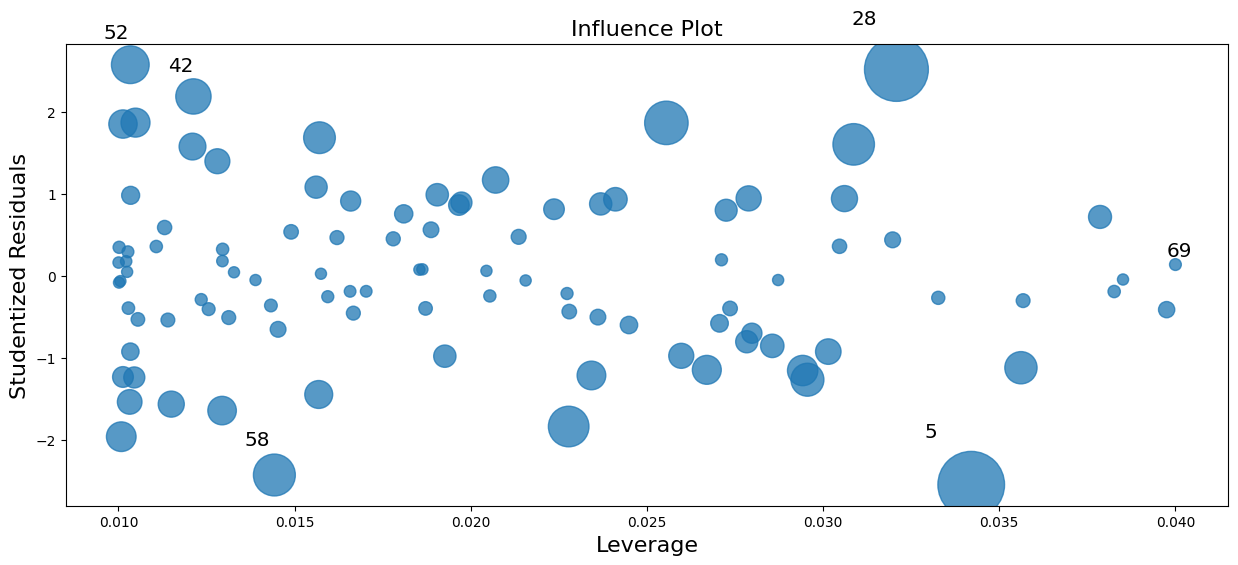

In [120]:
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(lm6, ax=ax)

This plot highlights how influential individual observations are, i.e. highlight the observation with great residuals yet with great leverage. There is no studentized residual larger than 3 or smaller than -3 and this indicates that is no outlier with high leverage. Visual inspection is sucessfully done.

### 6.8.6 Inspecting the regression output and also RMSE:

In [121]:
rmse6 = rmse(df6.y, df6.y_predicted)
nrmse6 = rmse6 / df6.y.mean()
print('RMSE = %f' % rmse6)
print('NRMSE = %f' % nrmse6)

lm6.summary()

RMSE = 9.248950
NRMSE = 0.249691


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     502.7
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           2.29e-40
Time:                        01:15:56   Log-Likelihood:                -364.34
No. Observations:                 100   AIC:                             732.7
Df Residuals:                      98   BIC:                             737.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0203      1.899     -0.011      0.991      -3.788       3.748
x              6.9703      0.311     22.420      0.000       6.353       7.587
==============================================================================
Omnibus:                        0.459   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.261
Skew:                           0.123   Prob(JB):                        0.877
Kurtosis:                       3.044   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The obtaned regression slope is positive (6.97), and the associated p-value is zero. This indicates very significant positive association between x and y.

The obtained regression intercept is -0.0203. Since the model is linear, i.e. the expected value when the x variable is zero is -0.0203.

R-squared from the model is 0.837, which means the x variable can explain only approximately 84% of the total variance of the y variable. This is a very big fraction, and it means that x is sufficient to accurately predict y.

The obtained RMSE is approximately 9.25, which means that on average our predictions are off by 9.25, which is approximately 25% of the average y data in our dataset.

***
# End